In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [422]:
data=pd.read_csv('auto_imports.csv')

In [423]:
data

3    ?  alfa-romero     gas    std   two  convertible  rwd  front  88.60  \
0    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
1    1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   94.5   
2    2  164         audi     gas    std  four        sedan  fwd  front   99.8   
3    2  164         audi     gas    std  four        sedan  4wd  front   99.4   
4    2    ?         audi     gas    std   two        sedan  fwd  front   99.8   
..  ..  ...          ...     ...    ...   ...          ...  ...    ...    ...   
195 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
196 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   
197 -1   95        volvo     gas    std  four        sedan  rwd  front  109.1   
198 -1   95        volvo  diesel  turbo  four        sedan  rwd  front  109.1   
199 -1   95        volvo     gas  turbo  four        sedan  rwd  front  109.1   

     168.80  64.10  48.80  2548  dohc  four  130  mpfi  3.47  2.68  9.00  111  \
0     168.8   64.1   48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111   
1     171.2   65.5   52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154   
2     176.6   66.2   54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102   
3     176.6   66.4   54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115   
4     177.3   66.3   53.1  2507   ohc  five  136  mpfi  3.19  3.40   8.5  110   
..      ...    ...    ...   ...   ...   ...  ...   ...   ...   ...   ...  ...   
195   188.8   68.9   55.5  2952   ohc  four  141  mpfi  3.78  3.15   9.5  114   
196   188.8   68.8   55.5  3049   ohc  four  141  mpfi  3.78  3.15   8.7  160   
197   188.8   68.9   55.5  3012  ohcv   six  173  mpfi  3.58  2.87   8.8  134   
198   188.8   68.9   55.5  3217   ohc   six  145   idi  3.01  3.40  23.0  106   
199   188.8   68.9   55.5  3062   ohc  four  141  mpfi  3.78  3.15   9.5  114   

     5000  21  27  13495  
0    5000  21  27  16500  
1    5000  19  26  16500  
2    5500  24  30  13950  
3    5500  18  22  17450  
4    5500  19  25  15250  
..    ...  ..  ..    ...  
195  5400  23  28  16845  
196  5300  19  25  19045  
197  5500  18  23  21485  
198  4800  26  27  22470  
199  5400  19  25  22625  

[200 rows x 26 columns]

In [424]:
columns = [
    "symboling",
    "normalized_losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price"
]


In [425]:
data.columns=columns

In [426]:
data

symboling normalized_losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            1                 ?  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2                 ?         audi       gas        std   
..         ...               ...          ...       ...        ...   
195         -1                95        volvo       gas        std   
196         -1                95        volvo       gas      turbo   
197         -1                95        volvo       gas        std   
198         -1                95        volvo    diesel      turbo   
199         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two    hatchback          rwd           front        94.5   
2           four        sedan          fwd           front        99.8   
3           four        sedan          4wd           front        99.4   
4            two        sedan          fwd           front        99.8   
..           ...          ...          ...             ...         ...   
195         four        sedan          rwd           front       109.1   
196         four        sedan          rwd           front       109.1   
197         four        sedan          rwd           front       109.1   
198         four        sedan          rwd           front       109.1   
199         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     171.2   65.5    52.4         2823        ohcv              six   
2     176.6   66.2    54.3         2337         ohc             four   
3     176.6   66.4    54.3         2824         ohc             five   
4     177.3   66.3    53.1         2507         ohc             five   
..      ...    ...     ...          ...         ...              ...   
195   188.8   68.9    55.5         2952         ohc             four   
196   188.8   68.8    55.5         3049         ohc             four   
197   188.8   68.9    55.5         3012        ohcv              six   
198   188.8   68.9    55.5         3217         ohc              six   
199   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            152        mpfi  2.68   3.47                9.0        154   
2            109        mpfi  3.19   3.40               10.0        102   
3            136        mpfi  3.19   3.40                8.0        115   
4            136        mpfi  3.19   3.40                8.5        110   
..           ...         ...   ...    ...                ...        ...   
195          141        mpfi  3.78   3.15                9.5        114   
196          141        mpfi  3.78   3.15                8.7        160   
197          173        mpfi  3.58   2.87                8.8        134   
198          145         idi  3.01   3.40               23.0        106   
199          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  16500  
1       5000        19           26  16500  
2       5500        24           30  13950  
3       5500        18           22  17450  
4       5500        19           25  15250  
..       ...       ...          ...    ...  
195     5400        23           28  16845  
196     5300        19           25  19045  
197     5500        18           23  21485  
198     4800        26           27  22470  
199     5400  

# Basic checks

In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

In [429]:
data.head(10)

symboling normalized_losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   
5          1               158         audi       gas        std         four   
6          1                 ?         audi       gas        std         four   
7          1               158         audi       gas      turbo         four   
8          2               192          bmw       gas        std          two   
9          0               192          bmw       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1    hatchback          rwd           front        94.5   171.2   65.5   
2        sedan          fwd           front        99.8   176.6   66.2   
3        sedan          4wd           front        99.4   176.6   66.4   
4        sedan          fwd           front        99.8   177.3   66.3   
5        sedan          fwd           front       105.8   192.7   71.4   
6        wagon          fwd           front       105.8   192.7   71.4   
7        sedan          fwd           front       105.8   192.7   71.4   
8        sedan          rwd           front       101.2   176.8   64.8   
9        sedan          rwd           front       101.2   176.8   64.8   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    52.4         2823        ohcv              six          152        mpfi   
2    54.3         2337         ohc             four          109        mpfi   
3    54.3         2824         ohc             five          136        mpfi   
4    53.1         2507         ohc             five          136        mpfi   
5    55.7         2844         ohc             five          136        mpfi   
6    55.7         2954         ohc             five          136        mpfi   
7    55.9         3086         ohc             five          131        mpfi   
8    54.3         2395         ohc             four          108        mpfi   
9    54.3         2395         ohc             four          108        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  2.68   3.47                9.0        154     5000        19           26   
2  3.19   3.40               10.0        102     5500        24           30   
3  3.19   3.40                8.0        115     5500        18           22   
4  3.19   3.40                8.5        110     5500        19           25   
5  3.19   3.40                8.5        110     5500        19           25   
6  3.19   3.40                8.5        110     5500        19           25   
7  3.13   3.40                8.3        140     5500        17           20   
8  3.50   2.80                8.8        101     5800        23           29   
9  3.50   2.80                8.8        101     5800        23           29   

   price  
0  16500  
1  16500  
2  13950  
3  17450  
4  15250  
5  17710  
6  18920  
7  23875  
8  16430  
9  16925

In [430]:
data.describe()

symboling  wheel-base      length       width      height  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.830000   98.848000  174.228000   65.898000   53.791500   
std      1.248557    6.038261   12.347132    2.102904    2.428449   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.675000   64.175000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.675000   55.525000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  \
count   200.000000   200.000000         200.000000  200.000000   200.000000   
mean   2555.705000   126.860000          10.170100   25.200000    30.705000   
std     518.594552    41.650501           4.014163    6.432487     6.827227   
min    1488.000000    61.000000           7.000000   13.000000    16.000000   
25%    2163.000000    97.750000           8.575000   19.000000    25.000000   
50%    2414.000000   119.500000           9.000000   24.000000    30.000000   
75%    2928.250000   142.000000           9.400000   30.000000    34.000000   
max    4066.000000   326.000000          23.000000   49.000000    54.000000   

              price  
count    200.000000  
mean   13205.690000  
std     7966.982558  
min     5118.000000  
25%     7775.000000  
50%    10270.000000  
75%    16500.750000  
max    45400.000000

In [431]:
data.replace('?',np.nan,inplace=True)

In [432]:
data

symboling normalized_losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            1               NaN  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2               NaN         audi       gas        std   
..         ...               ...          ...       ...        ...   
195         -1                95        volvo       gas        std   
196         -1                95        volvo       gas      turbo   
197         -1                95        volvo       gas        std   
198         -1                95        volvo    diesel      turbo   
199         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two    hatchback          rwd           front        94.5   
2           four        sedan          fwd           front        99.8   
3           four        sedan          4wd           front        99.4   
4            two        sedan          fwd           front        99.8   
..           ...          ...          ...             ...         ...   
195         four        sedan          rwd           front       109.1   
196         four        sedan          rwd           front       109.1   
197         four        sedan          rwd           front       109.1   
198         four        sedan          rwd           front       109.1   
199         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     171.2   65.5    52.4         2823        ohcv              six   
2     176.6   66.2    54.3         2337         ohc             four   
3     176.6   66.4    54.3         2824         ohc             five   
4     177.3   66.3    53.1         2507         ohc             five   
..      ...    ...     ...          ...         ...              ...   
195   188.8   68.9    55.5         2952         ohc             four   
196   188.8   68.8    55.5         3049         ohc             four   
197   188.8   68.9    55.5         3012        ohcv              six   
198   188.8   68.9    55.5         3217         ohc              six   
199   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore stroke  compression-ratio horsepower  \
0            130        mpfi  3.47   2.68                9.0        111   
1            152        mpfi  2.68   3.47                9.0        154   
2            109        mpfi  3.19   3.40               10.0        102   
3            136        mpfi  3.19   3.40                8.0        115   
4            136        mpfi  3.19   3.40                8.5        110   
..           ...         ...   ...    ...                ...        ...   
195          141        mpfi  3.78   3.15                9.5        114   
196          141        mpfi  3.78   3.15                8.7        160   
197          173        mpfi  3.58   2.87                8.8        134   
198          145         idi  3.01   3.40               23.0        106   
199          141        mpfi  3.78   3.15                9.5        114   

    peak-rpm  city-mpg  highway-mpg  price  
0       5000        21           27  16500  
1       5000        19           26  16500  
2       5500        24           30  13950  
3       5500        18           22  17450  
4       5500        19           25  15250  
..       ...       ...          ...    ...  
195     5400        23           28  16845  
196     5300        19           25  19045  
197     5500        18           23  21485  
198     4800        26           27  22470  
199     5400  

In [433]:
data.isnull().sum()

symboling             0
normalized_losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [434]:
data.rename(columns={"normalized_losses":"Normalized_loss","make":"Make","fuel-type":"Fuel_type","aspiaration":"Aspiration","num-of-doors":"Doors","body-style":"Body_style","drive-wheels":"Drive_wheels","engine-location":"Engine_location","wheel-base":"Wheel_base","length":"Length","width":"Width","height":"Height","curb-weight":"Curb_weight","engine-type":"Engine_type","num-of-cyilnders":"Cylinders","engine-size":"Engine_size","fuel-system":"Fuel_system","bore":"Bore","stroke":"Stroke","compression-ratio":"Compression_ratio","horsepower":"Horsepower","peak-rpm":"Peak_rpm","city-mpg":"City_mpg","highway-mpg":"Highway_mpg"},inplace=True)

In [435]:
data.columns

Index(['symboling', 'Normalized_loss', 'Make', 'Fuel_type', 'aspiration',
       'Doors', 'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base',
       'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type',
       'num-of-cylinders', 'Engine_size', 'Fuel_system', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'price'],
      dtype='object')

# EDA


# Replacing null values

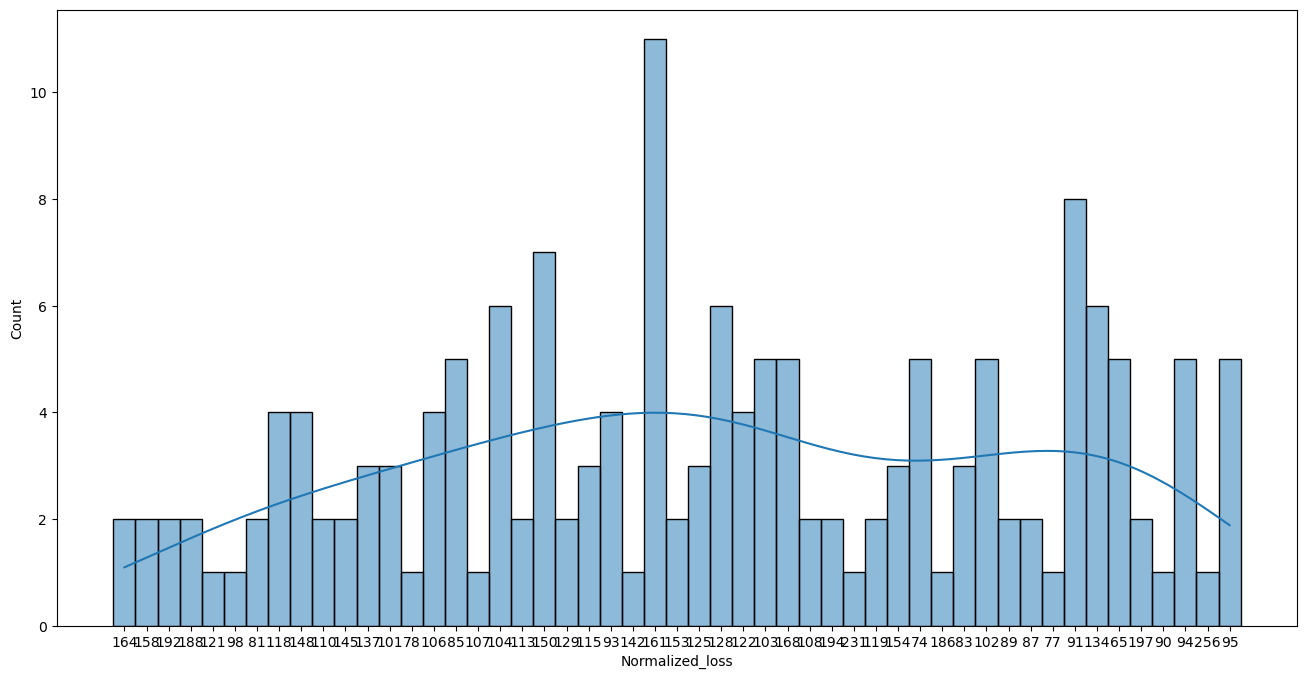

In [438]:
plt.figure(figsize=(16,8))
sns.histplot(data=data,x="Normalized_loss",kde=True)
plt.show()

In [439]:
data["Normalized_loss"].fillna(data["Normalized_loss"].astype("float").mean(), inplace=True)

In [440]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
aspiration           0
Doors                2
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
num-of-cylinders     0
Engine_size          0
Fuel_system          0
Bore                 4
Stroke               4
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

In [441]:
data['Doors'].mode()

0    four
Name: Doors, dtype: object

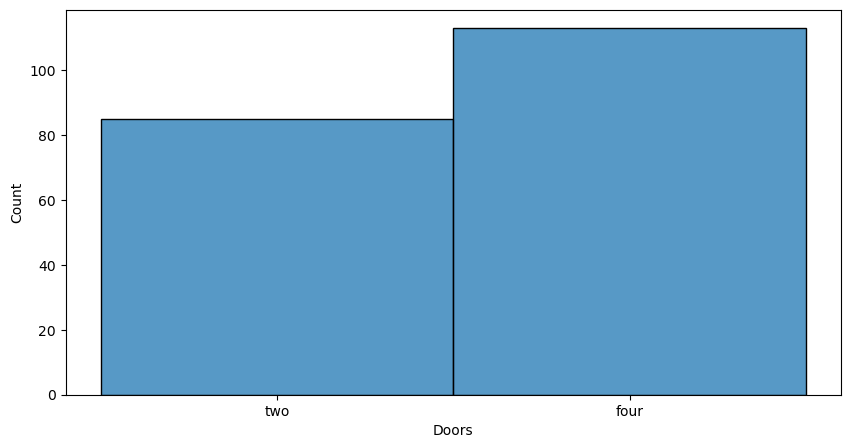

In [442]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='Doors')
plt.show()

In [443]:
data['Doors'].fillna('four',inplace=True)

In [444]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
num-of-cylinders     0
Engine_size          0
Fuel_system          0
Bore                 4
Stroke               4
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

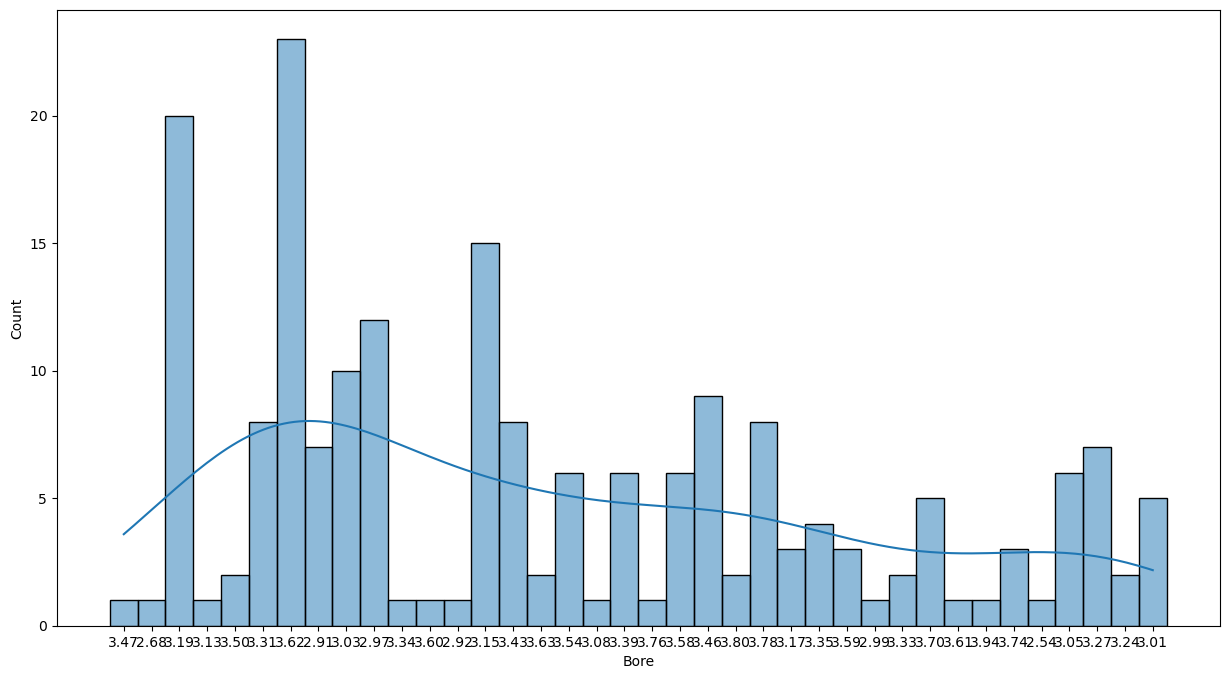

In [445]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Bore',kde=True)
plt.show()

In [446]:
data['Bore'].fillna(data['Bore'].astype('float').mean(),inplace=True)

In [447]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
num-of-cylinders     0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               4
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

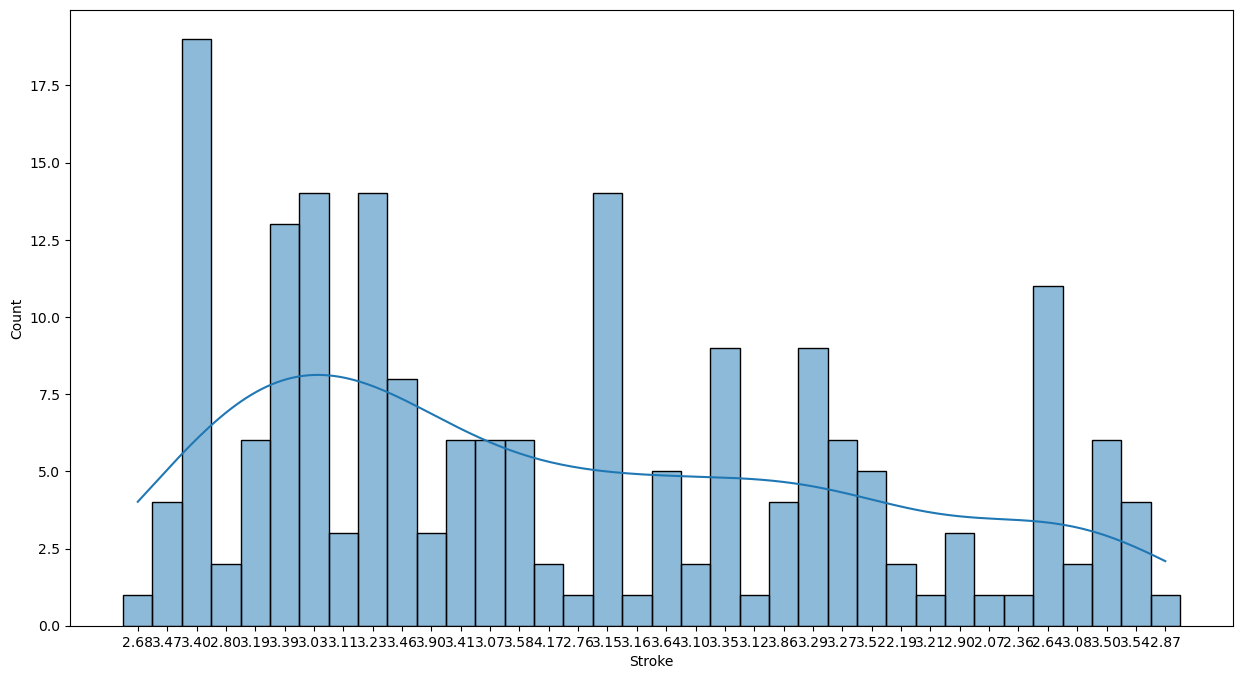

In [448]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Stroke',kde=True)
plt.show()

In [449]:
data['Stroke'].fillna(data['Stroke'].astype('float').mean(),inplace=True)

In [450]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
num-of-cylinders     0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           2
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

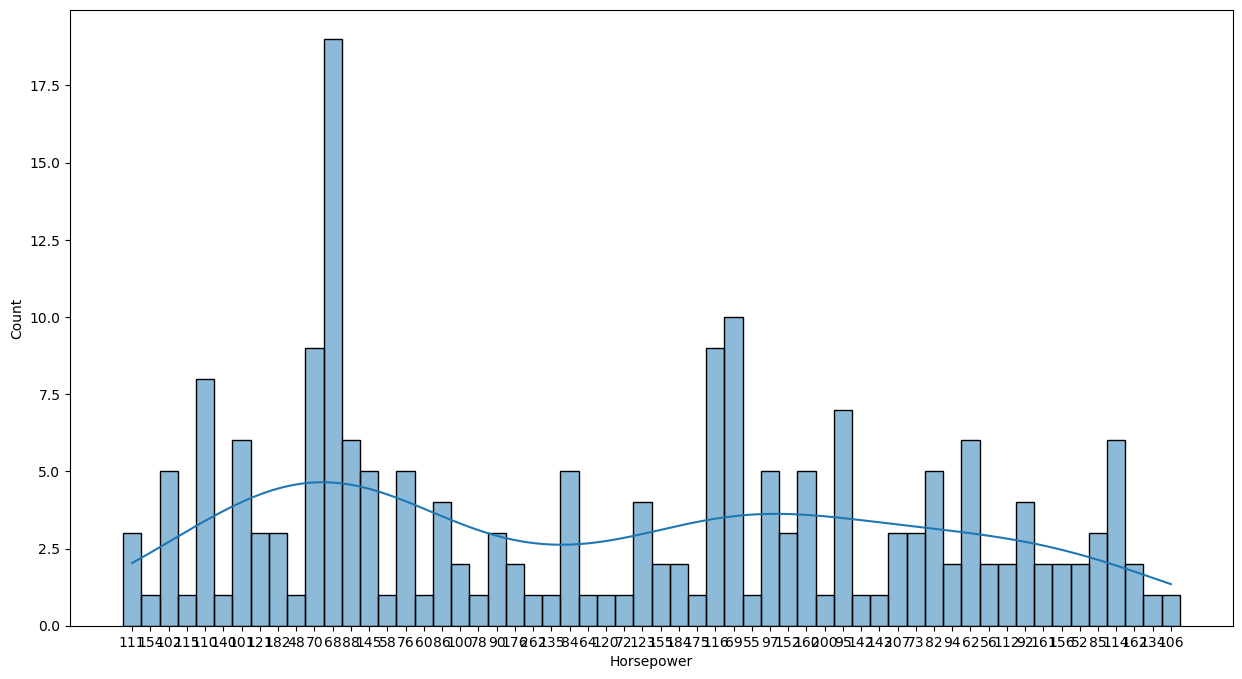

In [451]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Horsepower',kde=True)
plt.show()

In [452]:
data['Horsepower'].fillna(data['Horsepower'].astype('float').mean(),inplace=True)


In [453]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
num-of-cylinders     0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             2
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

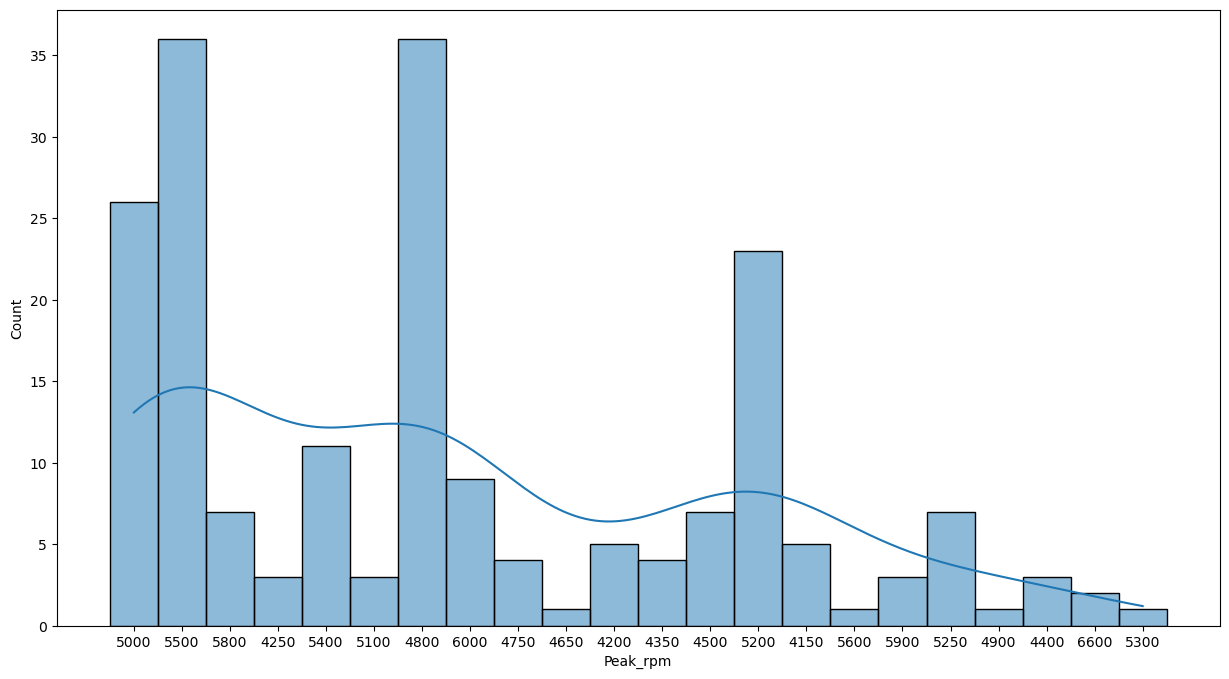

In [454]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Peak_rpm',kde=True)
plt.show()

In [455]:
data['Peak_rpm'].fillna(data['Peak_rpm'].astype('float').median(),inplace=True)

In [456]:
data.isnull().sum()

symboling            0
Normalized_loss      0
Make                 0
Fuel_type            0
aspiration           0
Doors                0
Body_style           0
Drive_wheels         0
Engine_location      0
Wheel_base           0
Length               0
Width                0
Height               0
Curb_weight          0
Engine_type          0
num-of-cylinders     0
Engine_size          0
Fuel_system          0
Bore                 0
Stroke               0
Compression_ratio    0
Horsepower           0
Peak_rpm             0
City_mpg             0
Highway_mpg          0
price                0
dtype: int64

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   Normalized_loss    200 non-null    object 
 2   Make               200 non-null    object 
 3   Fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   Doors              200 non-null    object 
 6   Body_style         200 non-null    object 
 7   Drive_wheels       200 non-null    object 
 8   Engine_location    200 non-null    object 
 9   Wheel_base         200 non-null    float64
 10  Length             200 non-null    float64
 11  Width              200 non-null    float64
 12  Height             200 non-null    float64
 13  Curb_weight        200 non-null    int64  
 14  Engine_type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  Engine_size        200 non

In [458]:
data.columns

Index(['symboling', 'Normalized_loss', 'Make', 'Fuel_type', 'aspiration',
       'Doors', 'Body_style', 'Drive_wheels', 'Engine_location', 'Wheel_base',
       'Length', 'Width', 'Height', 'Curb_weight', 'Engine_type',
       'num-of-cylinders', 'Engine_size', 'Fuel_system', 'Bore', 'Stroke',
       'Compression_ratio', 'Horsepower', 'Peak_rpm', 'City_mpg',
       'Highway_mpg', 'price'],
      dtype='object')

In [459]:
data=data.astype({'Normalized_loss':float,'Bore': float,'Stroke':float,'Horsepower':float,'Peak_rpm':float})

In [460]:
data

symboling  Normalized_loss         Make Fuel_type aspiration Doors  \
0            3            122.0  alfa-romero       gas        std   two   
1            1            122.0  alfa-romero       gas        std   two   
2            2            164.0         audi       gas        std  four   
3            2            164.0         audi       gas        std  four   
4            2            122.0         audi       gas        std   two   
..         ...              ...          ...       ...        ...   ...   
195         -1             95.0        volvo       gas        std  four   
196         -1             95.0        volvo       gas      turbo  four   
197         -1             95.0        volvo       gas        std  four   
198         -1             95.0        volvo    diesel      turbo  four   
199         -1             95.0        volvo       gas      turbo  four   

      Body_style Drive_wheels Engine_location  Wheel_base  Length  Width  \
0    convertible          rwd           front        88.6   168.8   64.1   
1      hatchback          rwd           front        94.5   171.2   65.5   
2          sedan          fwd           front        99.8   176.6   66.2   
3          sedan          4wd           front        99.4   176.6   66.4   
4          sedan          fwd           front        99.8   177.3   66.3   
..           ...          ...             ...         ...     ...    ...   
195        sedan          rwd           front       109.1   188.8   68.9   
196        sedan          rwd           front       109.1   188.8   68.8   
197        sedan          rwd           front       109.1   188.8   68.9   
198        sedan          rwd           front       109.1   188.8   68.9   
199        sedan          rwd           front       109.1   188.8   68.9   

     Height  Curb_weight Engine_type num-of-cylinders  Engine_size  \
0      48.8         2548        dohc             four          130   
1      52.4         2823        ohcv              six          152   
2      54.3         2337         ohc             four          109   
3      54.3         2824         ohc             five          136   
4      53.1         2507         ohc             five          136   
..      ...          ...         ...              ...          ...   
195    55.5         2952         ohc             four          141   
196    55.5         3049         ohc             four          141   
197    55.5         3012        ohcv              six          173   
198    55.5         3217         ohc              six          145   
199    55.5         3062         ohc             four          141   

    Fuel_system  Bore  Stroke  Compression_ratio  Horsepower  Peak_rpm  \
0          mpfi  3.47    2.68                9.0       111.0    5000.0   
1          mpfi  2.68    3.47                9.0       154.0    5000.0   
2          mpfi  3.19    3.40               10.0       102.0    5500.0   
3          mpfi  3.19    3.40                8.0       115.0    5500.0   
4          mpfi  3.19    3.40                8.5       110.0    5500.0   
..          ...   ...     ...                ...         ...       ...   
195        mpfi  3.78    3.15                9.5       114.0    5400.0   
196        mpfi  3.78    3.15                8.7       160.0    5300.0   
197        mpfi  3.58    2.87                8.8       134.0    5500.0   
198         idi  3.01    3.40               23.0       106.0    4800.0   
199        mpfi  3.78    3.15                9.5       114.0    5400.0   

     City_mpg  Highway_mpg  price  
0          21           27  16500  
1          19           26  16500  
2          24           30  13950  
3          18           22  17450  
4          19           25  15250  
..        ...          ...    ...  
195        23           28  16845  
196        19           25  19045  
197        18           23  21485  
198        26           27  22470  
199        19           25  22625  

[200 rows x 26 columns]

In [461]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   Normalized_loss    200 non-null    float64
 2   Make               200 non-null    object 
 3   Fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   Doors              200 non-null    object 
 6   Body_style         200 non-null    object 
 7   Drive_wheels       200 non-null    object 
 8   Engine_location    200 non-null    object 
 9   Wheel_base         200 non-null    float64
 10  Length             200 non-null    float64
 11  Width              200 non-null    float64
 12  Height             200 non-null    float64
 13  Curb_weight        200 non-null    int64  
 14  Engine_type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  Engine_size        200 non

In [462]:
numeric=data.select_dtypes(exclude='object')
numeric

symboling  Normalized_loss  Wheel_base  Length  Width  Height  \
0            3            122.0        88.6   168.8   64.1    48.8   
1            1            122.0        94.5   171.2   65.5    52.4   
2            2            164.0        99.8   176.6   66.2    54.3   
3            2            164.0        99.4   176.6   66.4    54.3   
4            2            122.0        99.8   177.3   66.3    53.1   
..         ...              ...         ...     ...    ...     ...   
195         -1             95.0       109.1   188.8   68.9    55.5   
196         -1             95.0       109.1   188.8   68.8    55.5   
197         -1             95.0       109.1   188.8   68.9    55.5   
198         -1             95.0       109.1   188.8   68.9    55.5   
199         -1             95.0       109.1   188.8   68.9    55.5   

     Curb_weight  Engine_size  Bore  Stroke  Compression_ratio  Horsepower  \
0           2548          130  3.47    2.68                9.0       111.0   
1           2823          152  2.68    3.47                9.0       154.0   
2           2337          109  3.19    3.40               10.0       102.0   
3           2824          136  3.19    3.40                8.0       115.0   
4           2507          136  3.19    3.40                8.5       110.0   
..           ...          ...   ...     ...                ...         ...   
195         2952          141  3.78    3.15                9.5       114.0   
196         3049          141  3.78    3.15                8.7       160.0   
197         3012          173  3.58    2.87                8.8       134.0   
198         3217          145  3.01    3.40               23.0       106.0   
199         3062          141  3.78    3.15                9.5       114.0   

     Peak_rpm  City_mpg  Highway_mpg  price  
0      5000.0        21           27  16500  
1      5000.0        19           26  16500  
2      5500.0        24           30  13950  
3      5500.0        18           22  17450  
4      5500.0        19           25  15250  
..        ...       ...          ...    ...  
195    5400.0        23           28  16845  
196    5300.0        19           25  19045  
197    5500.0        18           23  21485  
198    4800.0        26           27  22470  
199    5400.0        19           25  22625  

[200 rows x 16 columns]

In [463]:
categorical=data.select_dtypes(include='object')

In [464]:
cat_col=categorical.columns

In [465]:
cat_col

Index(['Make', 'Fuel_type', 'aspiration', 'Doors', 'Body_style',
       'Drive_wheels', 'Engine_location', 'Engine_type', 'num-of-cylinders',
       'Fuel_system'],
      dtype='object')

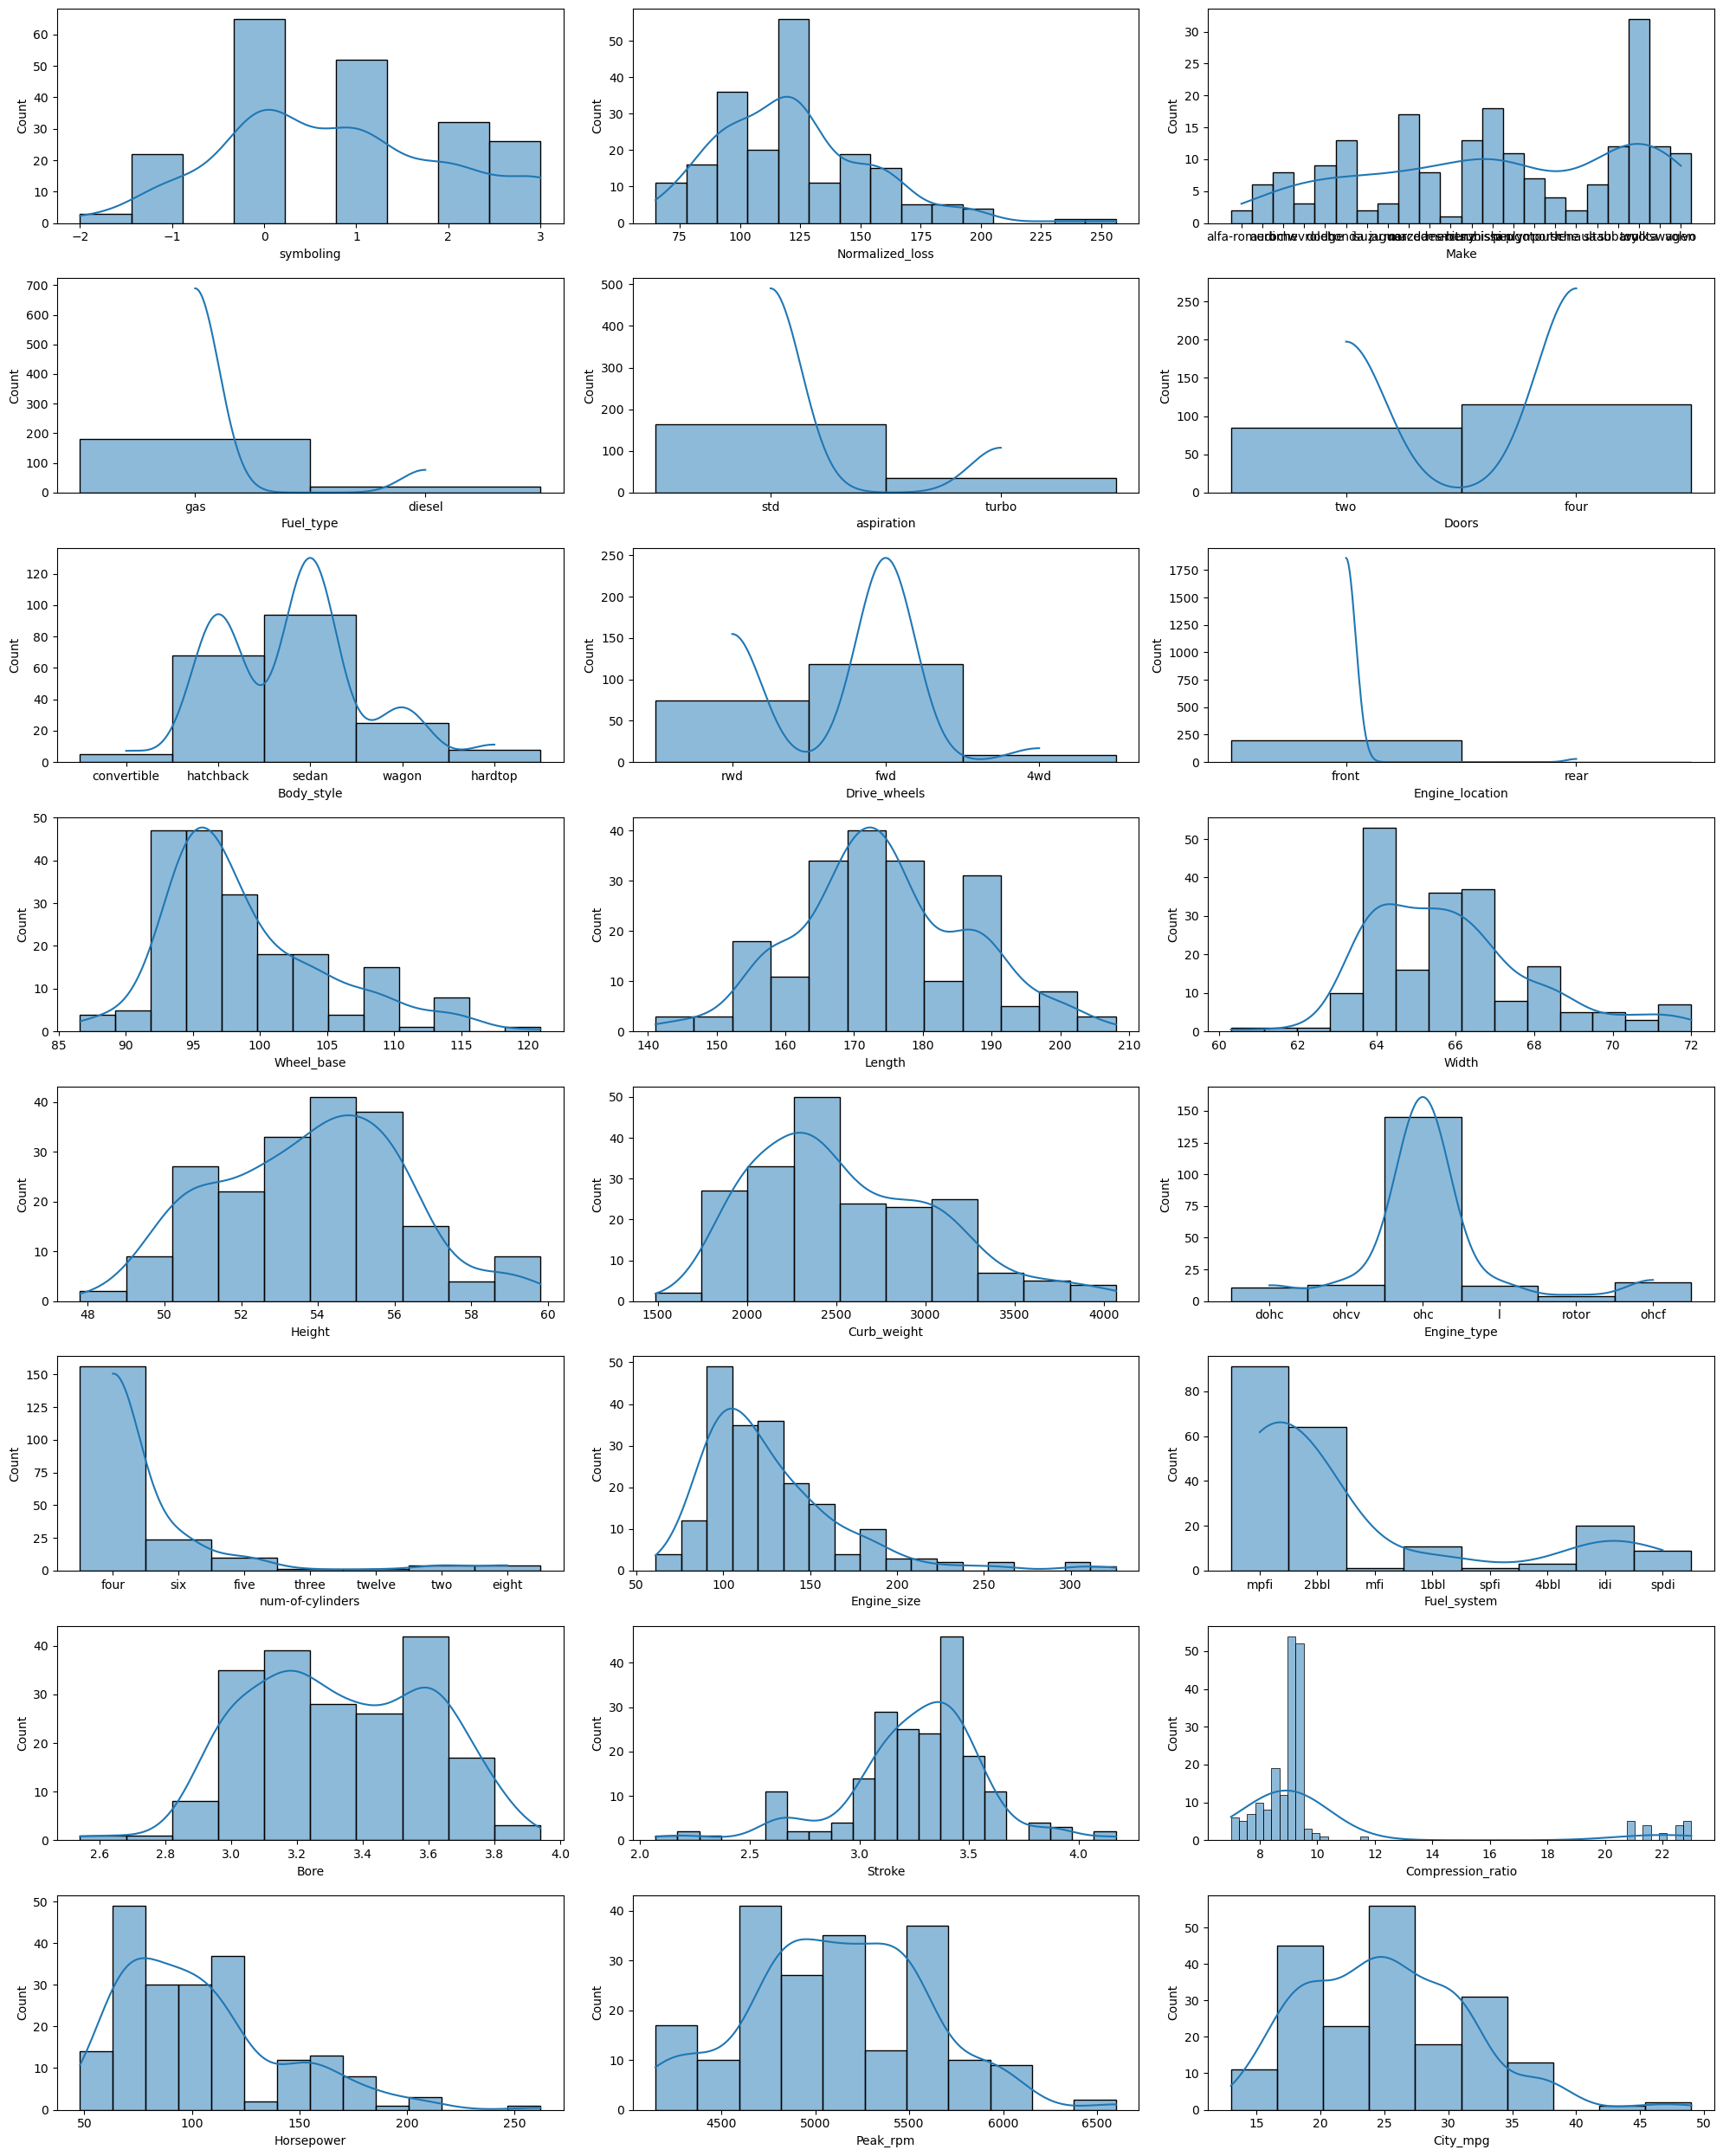

In [466]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
  if plotnumber<=24:
    ax=plt.subplot(8,3,plotnumber)
    sns.histplot(x=data[column],kde=True)
    plt.xlabel(column,fontsize=10)

  plotnumber+=1
plt.tight_layout()
plt.show()


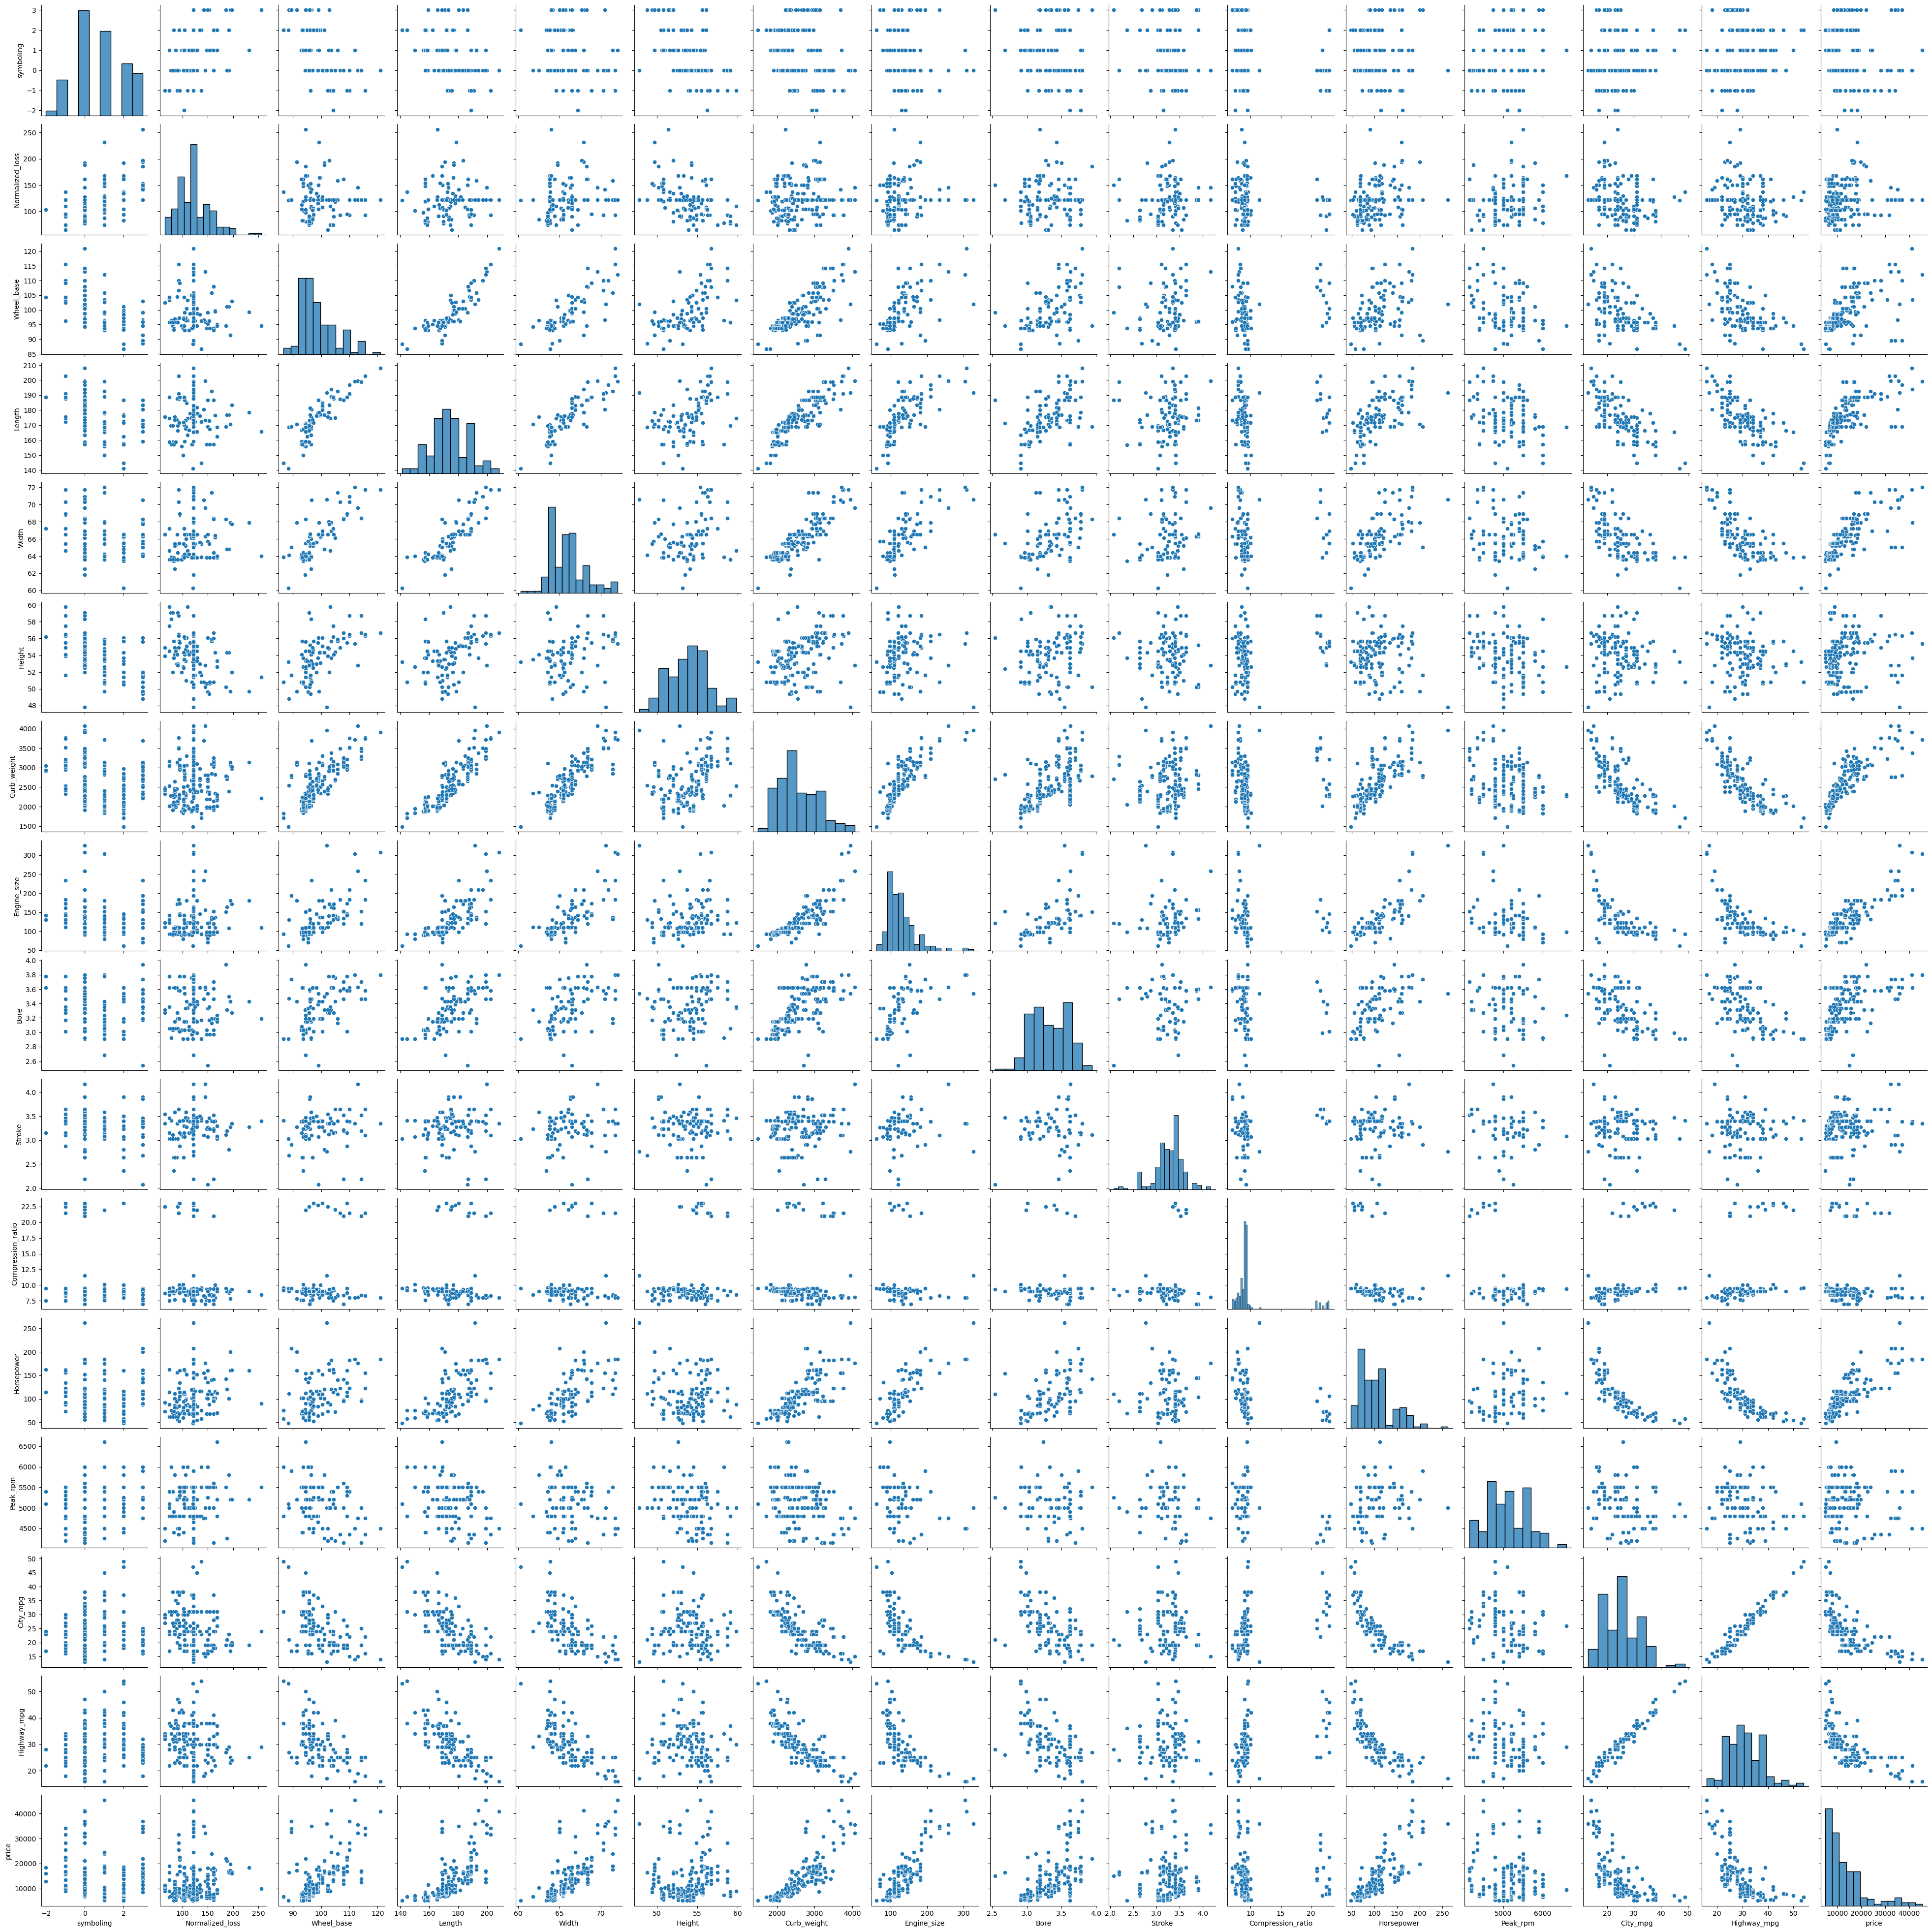

In [467]:
sns.pairplot(numeric)
plt.show()

In [468]:
numeric

symboling  Normalized_loss  Wheel_base  Length  Width  Height  \
0            3            122.0        88.6   168.8   64.1    48.8   
1            1            122.0        94.5   171.2   65.5    52.4   
2            2            164.0        99.8   176.6   66.2    54.3   
3            2            164.0        99.4   176.6   66.4    54.3   
4            2            122.0        99.8   177.3   66.3    53.1   
..         ...              ...         ...     ...    ...     ...   
195         -1             95.0       109.1   188.8   68.9    55.5   
196         -1             95.0       109.1   188.8   68.8    55.5   
197         -1             95.0       109.1   188.8   68.9    55.5   
198         -1             95.0       109.1   188.8   68.9    55.5   
199         -1             95.0       109.1   188.8   68.9    55.5   

     Curb_weight  Engine_size  Bore  Stroke  Compression_ratio  Horsepower  \
0           2548          130  3.47    2.68                9.0       111.0   
1           2823          152  2.68    3.47                9.0       154.0   
2           2337          109  3.19    3.40               10.0       102.0   
3           2824          136  3.19    3.40                8.0       115.0   
4           2507          136  3.19    3.40                8.5       110.0   
..           ...          ...   ...     ...                ...         ...   
195         2952          141  3.78    3.15                9.5       114.0   
196         3049          141  3.78    3.15                8.7       160.0   
197         3012          173  3.58    2.87                8.8       134.0   
198         3217          145  3.01    3.40               23.0       106.0   
199         3062          141  3.78    3.15                9.5       114.0   

     Peak_rpm  City_mpg  Highway_mpg  price  
0      5000.0        21           27  16500  
1      5000.0        19           26  16500  
2      5500.0        24           30  13950  
3      5500.0        18           22  17450  
4      5500.0        19           25  15250  
..        ...       ...          ...    ...  
195    5400.0        23           28  16845  
196    5300.0        19           25  19045  
197    5500.0        18           23  21485  
198    4800.0        26           27  22470  
199    5400.0        19           25  22625  

[200 rows x 16 columns]

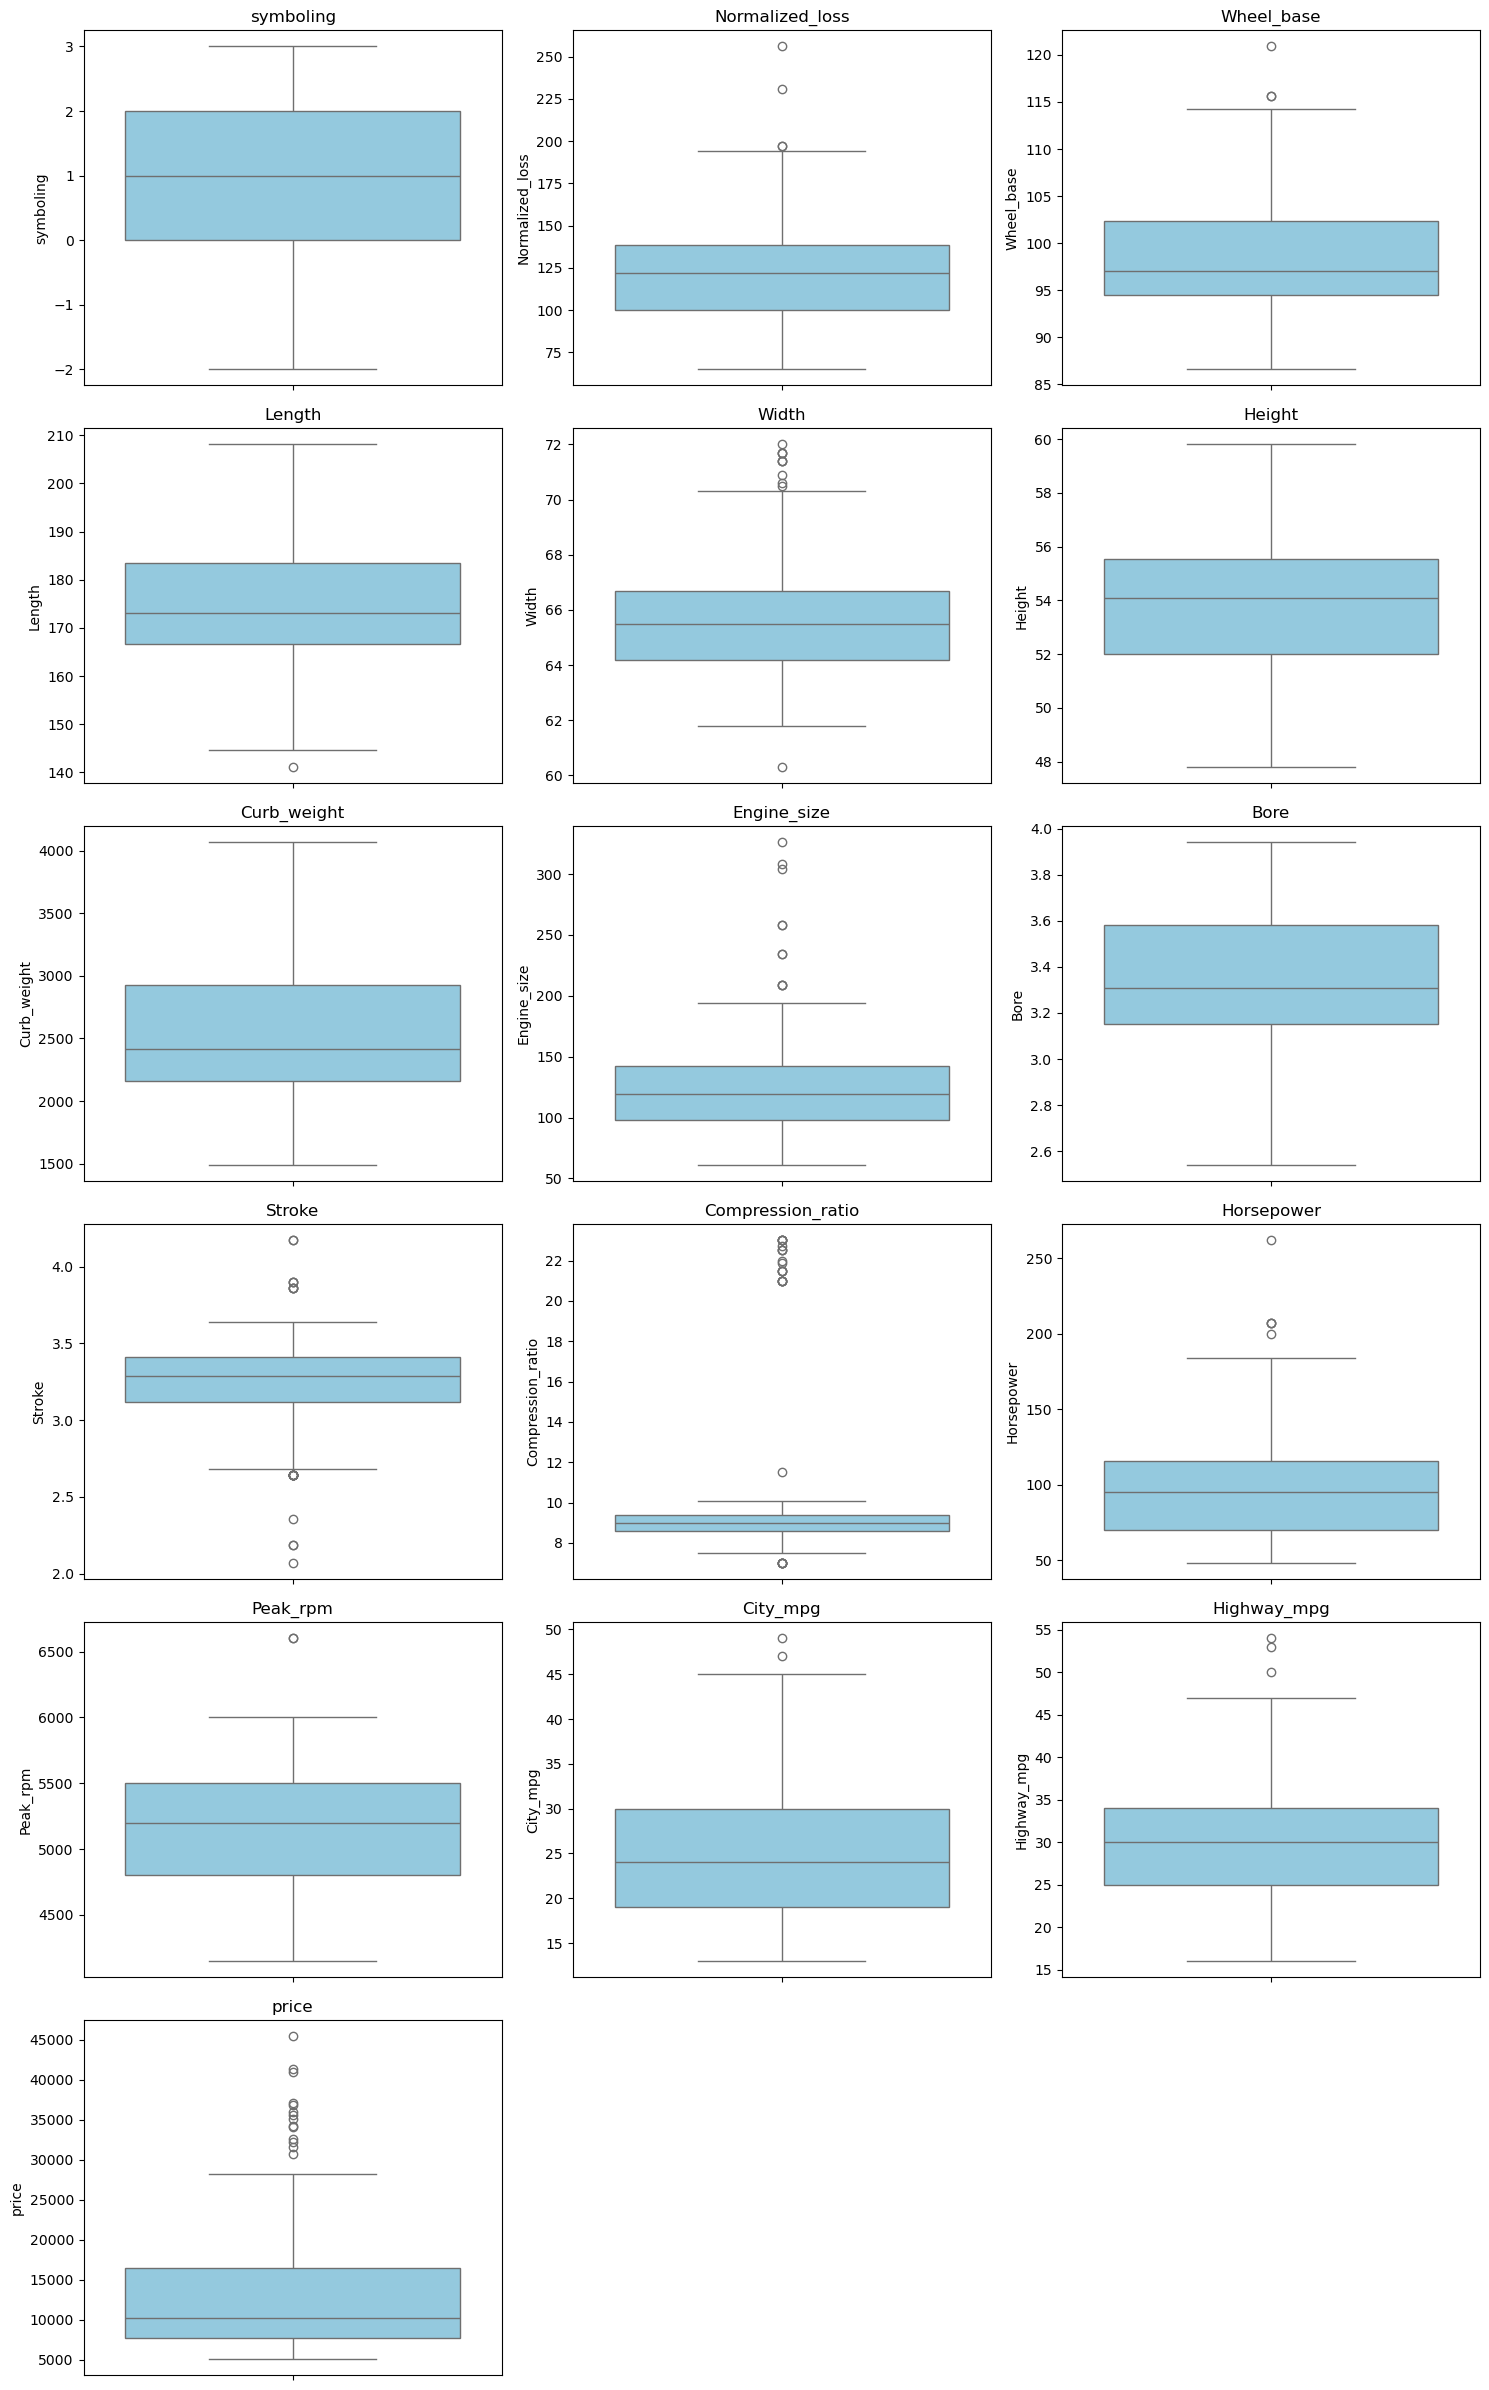

In [469]:
n=len(numeric.columns)
rows=math.ceil(n/3)
cols=3
plt.figure(figsize=(15,rows*4))

for i, col in enumerate(numeric, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

# outlier_present_column
 1)width
2)engine_size
3)stroke
4)compresion_ratio
5)horse power
6)highway_mpj
7)price

# outlier_for_width 

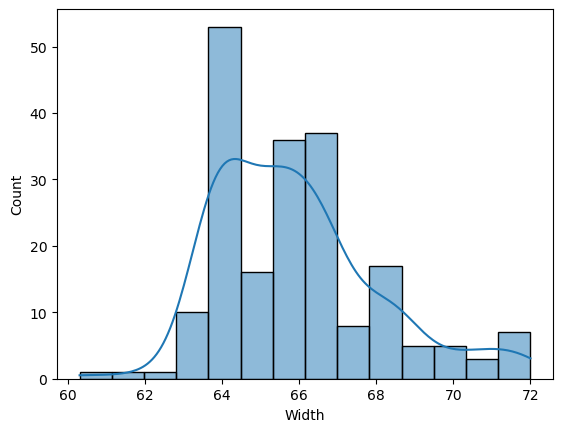

In [472]:
sns.histplot(data['Width'],kde=True)
plt.show()

In [473]:
outlier_width=sorted(data['Width'])
Q1,Q3=np.percentile(outlier_width,[25,75])
IQR=Q3-Q1
lower_bound_level=Q1-(1.5 * IQR)
upper_bound_level=Q3+(1.5 * IQR)
print('IQR',IQR)
print('lower_bound_level',lower_bound_level)
print('upper_bound_level',upper_bound_level)

IQR 2.5
lower_bound_level 60.425
upper_bound_level 70.425


In [474]:
mean=data['Width'].mean()

In [475]:
data['Width']=np.where((data['Width']<lower_bound_level)|(data['Width']> upper_bound_level),mean,data['Width'])

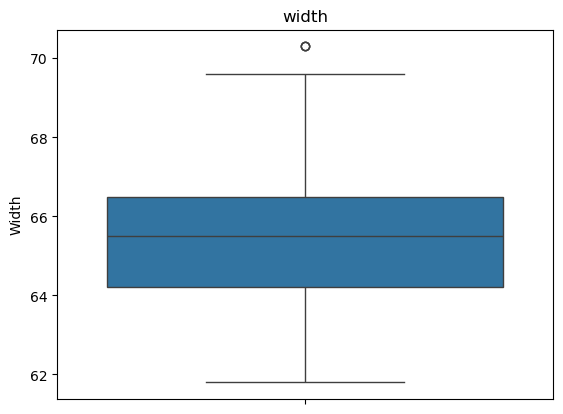

In [476]:
sns.boxplot(data['Width'])
plt.title('width')
plt.show()

# outlier_for_Engine_size

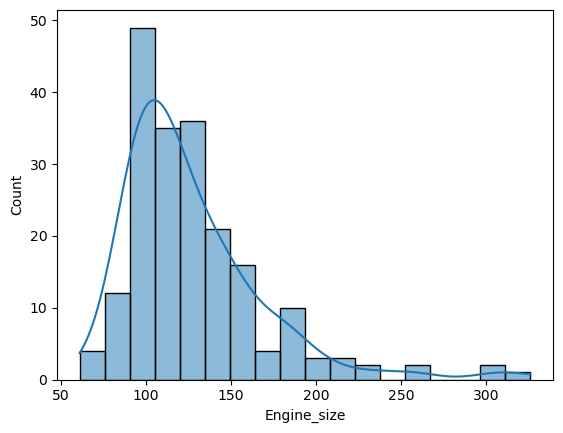

In [478]:
sns.histplot(data['Engine_size'],kde=True)
plt.show()

“This column is right-skewed, so I replaced the outlier values with the median.”

In [480]:
outlier_engine_size=sorted(data['Engine_size'])
q1,q3=np.percentile(outlier_engine_size,[25,75])
iqr=q3-q1
lower=q1-(1.5*iqr)
higher=q3+(1.5*iqr)
print('IQR:',iqr)
print('lower_bound:',lower)
print('upper_bound:',higher)

IQR: 44.25
lower_bound: 31.375
upper_bound: 208.375


In [481]:
meadian_engine=data['Engine_size'].median()

In [482]:
meadian_engine

119.5

In [483]:
data['Engine_size']=np.where((data['Engine_size']< lower)|(data['Engine_size']>higher),meadian_engine,data['Engine_size'])

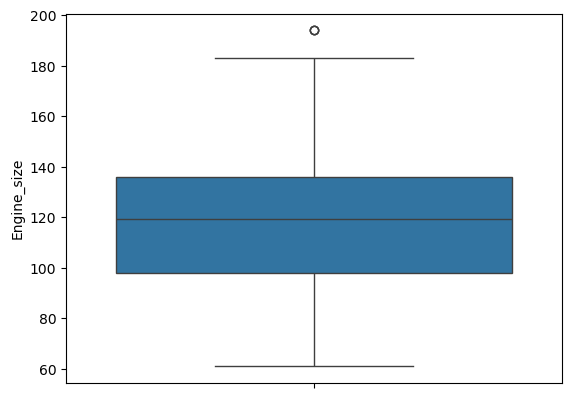

In [484]:
sns.boxplot(data['Engine_size'])
plt.show()

# outlier_for_stroke

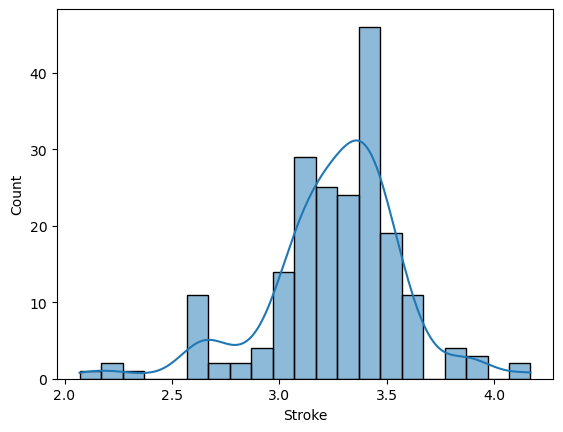

In [486]:
sns.histplot(data['Stroke'],kde=True)
plt.show()

“This column is left-skewed, so I replaced the outlier values with the median.”

In [488]:
outlier_Stroke=sorted(data['Stroke'])
q1,q3=np.percentile(outlier_Stroke,[25,75])
iqr=q3-q1
lower=q1-(1.5*iqr)
higher=q3+(1.5*iqr)
print('IQR:',iqr)
print('lower_bound:',lower)
print('upper_bound:',higher)

IQR: 0.2925
lower_bound: 2.67875
upper_bound: 3.84875


In [489]:
data_storke_median=data['Stroke'].median()

In [490]:
data['Stroke']=np.where((data['Stroke']<lower)|(data['Stroke']>higher),data_storke_median,data['Stroke'])

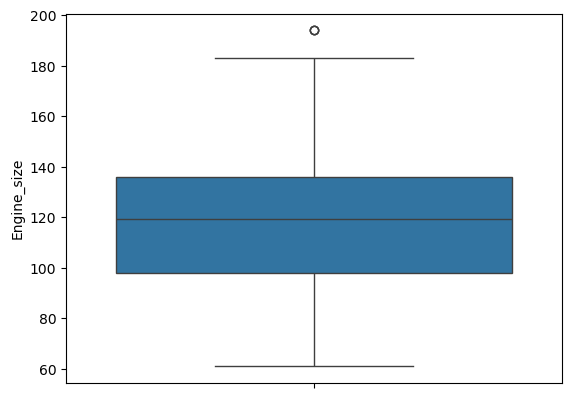

In [491]:
sns.boxplot(data['Engine_size'])
plt.show()

# outlier_for_compresion_ratio

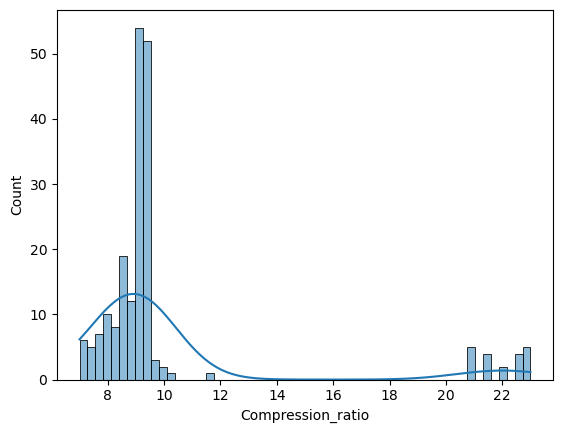

In [493]:
sns.histplot(data['Compression_ratio'],kde=True)
plt.show()

In [494]:
outlier_Compression_ratio=sorted(data['Compression_ratio'])
q1,q3=np.percentile(outlier_Compression_ratio,[25,75])
iqr=q3-q1
lower=q1-(1.5*iqr)
higher=q3+(1.5*iqr)
print('IQR:',iqr)
print('lower_bound:',lower)
print('upper_bound:',higher)

IQR: 0.8250000000000011
lower_bound: 7.337499999999998
upper_bound: 10.637500000000003


In [495]:
compresion_median=data['Compression_ratio'].median()

In [496]:
data['Compression_ratio']=np.where((data['Compression_ratio']<lower)|(data['Compression_ratio']>higher),compresion_median,data['Compression_ratio'])

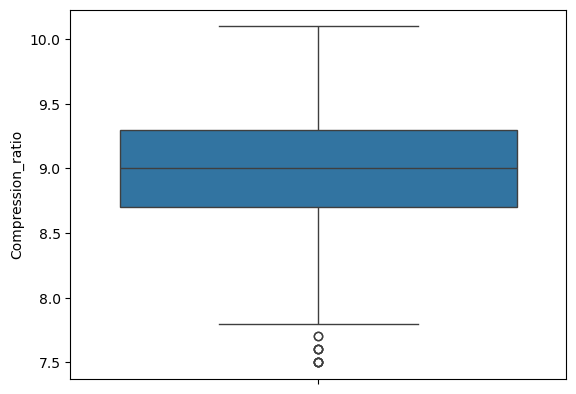

In [497]:
sns.boxplot(data['Compression_ratio'])
plt.show()

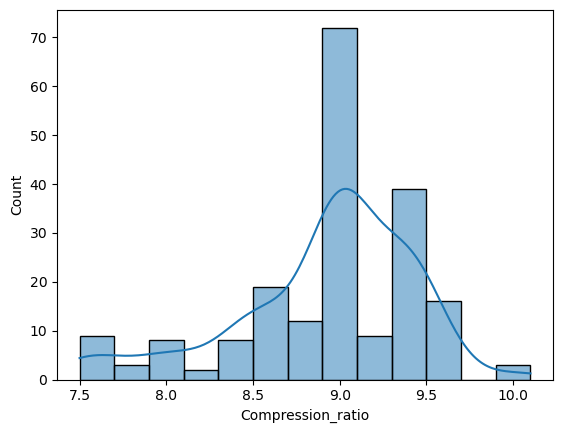

In [498]:
sns.histplot(data['Compression_ratio'],kde=True)
plt.show()

# outlier_for_Horse_power

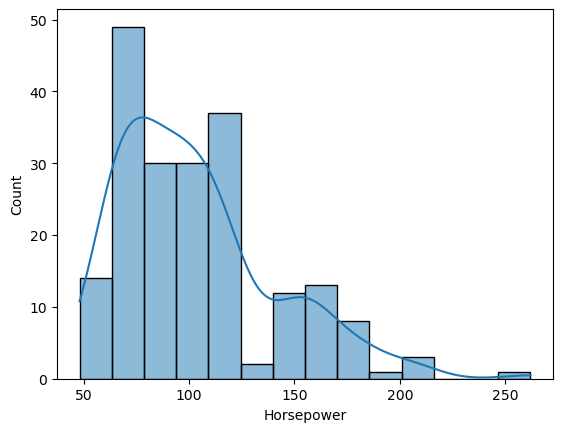

In [500]:
sns.histplot(data['Horsepower'],kde=True)
plt.show()

“This column is right-skewed, so I replaced the outlier values with the median.”

In [502]:
outlier_Horse_power=sorted(data['Horsepower'])
q1,q3=np.percentile(outlier_Horse_power,[25,75])
iqr=q3-q1
lower=q1-(1.5*iqr)
higher=q3+(1.5*iqr)
print('IQR:',iqr)
print('lower_bound:',lower)
print('upper_bound:',higher)

IQR: 46.0
lower_bound: 1.0
upper_bound: 185.0


In [503]:
horsepower_median=data['Horsepower'].median()

In [504]:
data['Horsepower']=np.where((data['Horsepower']<lower)|(data['Horsepower']>higher),horsepower_median,data['Horsepower'])

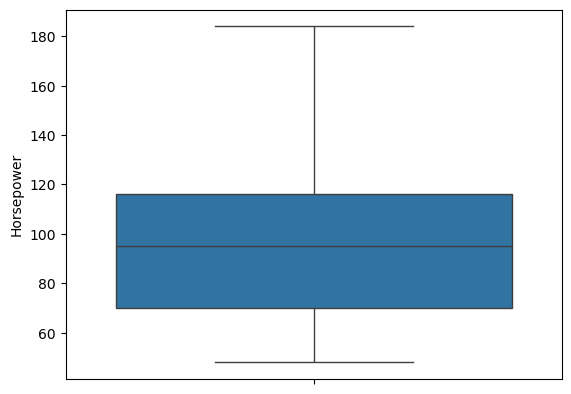

In [505]:
sns.boxplot(data['Horsepower'])
plt.show()

# outlier_for_Highway_mpg

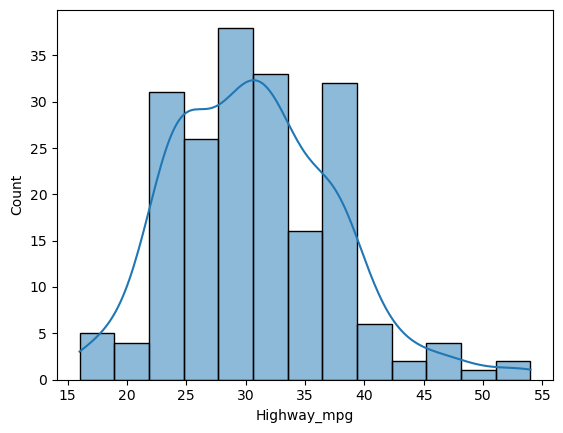

In [507]:
sns.histplot(data['Highway_mpg'],kde=True)
plt.show()

“This column is normal distribution, so I replaced the outlier values with the mean.”

In [509]:
outlier_highway_mpj=sorted(data['Highway_mpg'])
q1,q3=np.percentile(outlier_highway_mpj,[25,75])
iqr=q3-q1
lower=q1-(1.5*iqr)
higher=q3+(1.5*iqr)
print('IQR:',iqr)
print('lower_bound:',lower)
print('upper_bound:',higher)

IQR: 9.0
lower_bound: 11.5
upper_bound: 47.5


In [510]:
highway_mode=data['Highway_mpg'].mean()

In [511]:
data['Highway_mpg']=np.where((data['Highway_mpg']<lower)|(data['Highway_mpg']>higher),highway_mode,data['Highway_mpg'])

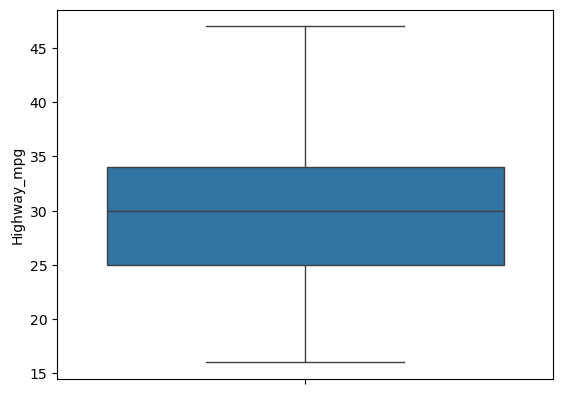

In [512]:
sns.boxplot(data['Highway_mpg'])
plt.show()

# outlier_for_citympg

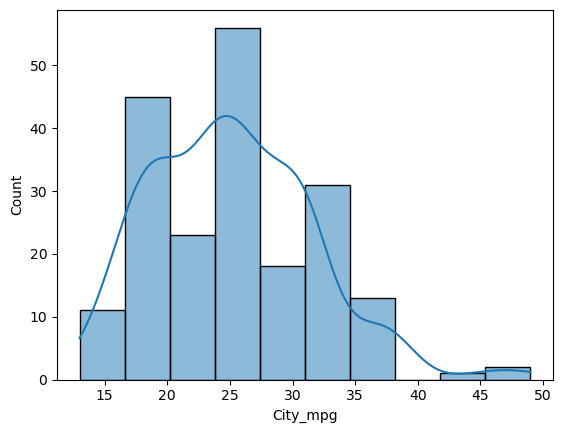

In [514]:
sns.histplot(data['City_mpg'],kde=True)
plt.show()

“This column is right-skewed, so I replaced the outlier values with the median.”

In [516]:
outlier_city_mpg=sorted(data['City_mpg'])
q1,q3=np.percentile(outlier_city_mpg,[25,75])
iqr=q3-q1
lower=q1-(1.5*iqr)
higher=q3+(1.5*iqr)
print('IQR:',iqr)
print('lower_bound:',lower)
print('upper_bound:',higher)

IQR: 11.0
lower_bound: 2.5
upper_bound: 46.5


In [517]:
city_mpg_median=data['City_mpg'].median()

In [518]:
data['City_mpg']=np.where((data['City_mpg']<lower)|(data['City_mpg']>higher),city_mpg_median,data['City_mpg'])

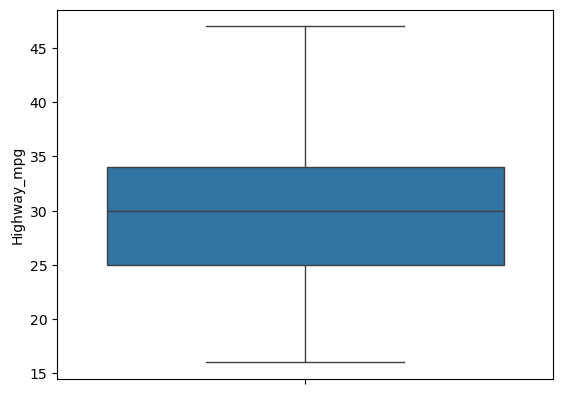

In [519]:
sns.boxplot(data['Highway_mpg'])
plt.show()

# Challenges Faced:

- **Skewed Data:** The distribution of 'Normalized Loss' was left-skewed, which made choosing between mean and median imputation critical. Median imputation was selected to handle the missing values in order to avoid undue influence from outliers.

- **Categorical Data Imputation:** Handling missing values in categorical data like 'Doors' required careful consideration. Since 'four' was the most common value, it was used to impute missing values.

- **Multiple Missing Values:** Some features like 'Bore', 'Stroke', 'Horsepower', and 'Peak RPM' had multiple missing values. A consistent approach was used by imputing these with their respective medians.

- **Outlier Treatment:** Outliers in various numeric features could have a significant impact on analysis and modeling. Capping the outliers at certain thresholds using the IQR method helped maintain data integrity.

# Overcoming Challenges:

`**1. Choosing Imputation Strategies:** The choice between mean and median imputation was driven by the distribution of the data. Visualizing the data through histograms and box plots helped make informed decisions.

**2. Handling Categorical Imputation:** Imputing categorical values with the mode, especially when the distribution is imbalanced, was a reasonable approach in this case.

**3. Consistency in Imputation:** The same imputation strategy was applied across similar features to maintain consistency and avoid introducing bias.

**4. Outlier Cap Thresholds:** Deciding on threshold values to cap the outliers required domain knowledge and understanding of the data. The IQR method provided a systematic approach.

# Conclusion:

Data preprocessing is a critical step in preparing data for analysis and modeling. Challenges such as skewed data, categorical imputation, and outlier handling were addressed using appropriate techniques. By making informed decisions and consistently applying preprocessing steps, the dataset was cleaned and organized, setting the stage for more accurate analysis and modeling in the subsequent stages.

# FEATURE ENGINEERING:

In [527]:
categorical

Make Fuel_type aspiration Doors   Body_style Drive_wheels  \
0    alfa-romero       gas        std   two  convertible          rwd   
1    alfa-romero       gas        std   two    hatchback          rwd   
2           audi       gas        std  four        sedan          fwd   
3           audi       gas        std  four        sedan          4wd   
4           audi       gas        std   two        sedan          fwd   
..           ...       ...        ...   ...          ...          ...   
195        volvo       gas        std  four        sedan          rwd   
196        volvo       gas      turbo  four        sedan          rwd   
197        volvo       gas        std  four        sedan          rwd   
198        volvo    diesel      turbo  four        sedan          rwd   
199        volvo       gas      turbo  four        sedan          rwd   

    Engine_location Engine_type num-of-cylinders Fuel_system  
0             front        dohc             four        mpfi  
1             front        ohcv              six        mpfi  
2             front         ohc             four        mpfi  
3             front         ohc             five        mpfi  
4             front         ohc             five        mpfi  
..              ...         ...              ...         ...  
195           front         ohc             four        mpfi  
196           front         ohc             four        mpfi  
197           front        ohcv              six        mpfi  
198           front         ohc              six         idi  
199           front         ohc             four        mpfi  

[200 rows x 10 columns]

# Make_column

In [529]:
data['Make'].unique()
data['Make'].value_counts()

Make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: count, dtype: int64

In [530]:
make= {
    'toyota': 0,
    'nissan': 1,
    'mazda': 2,
    'mitsubishi': 3,
    'honda': 4,
    'volkswagen': 5,
    'subaru': 6,
    'peugot': 7,
    'volvo': 8,
    'dodge': 9,
    'mercedes-benz': 10,
    'bmw': 11,
    'plymouth': 12,
    'audi': 13,
    'saab': 14,
    'porsche': 15,
    'jaguar': 16,
    'chevrolet': 17,
    'alfa-romero': 18,
    'isuzu': 19,
    'renault': 20,  
    'mercury': 21}

data['Make']=data['Make'].map(make)


    

In [531]:
data['Make']

0      18
1      18
2      13
3      13
4      13
       ..
195     8
196     8
197     8
198     8
199     8
Name: Make, Length: 200, dtype: int64

In [532]:
data

symboling  Normalized_loss  Make Fuel_type aspiration Doors   Body_style  \
0            3            122.0    18       gas        std   two  convertible   
1            1            122.0    18       gas        std   two    hatchback   
2            2            164.0    13       gas        std  four        sedan   
3            2            164.0    13       gas        std  four        sedan   
4            2            122.0    13       gas        std   two        sedan   
..         ...              ...   ...       ...        ...   ...          ...   
195         -1             95.0     8       gas        std  four        sedan   
196         -1             95.0     8       gas      turbo  four        sedan   
197         -1             95.0     8       gas        std  four        sedan   
198         -1             95.0     8    diesel      turbo  four        sedan   
199         -1             95.0     8       gas      turbo  four        sedan   

    Drive_wheels Engine_location  Wheel_base  Length  Width  Height  \
0            rwd           front        88.6   168.8   64.1    48.8   
1            rwd           front        94.5   171.2   65.5    52.4   
2            fwd           front        99.8   176.6   66.2    54.3   
3            4wd           front        99.4   176.6   66.4    54.3   
4            fwd           front        99.8   177.3   66.3    53.1   
..           ...             ...         ...     ...    ...     ...   
195          rwd           front       109.1   188.8   68.9    55.5   
196          rwd           front       109.1   188.8   68.8    55.5   
197          rwd           front       109.1   188.8   68.9    55.5   
198          rwd           front       109.1   188.8   68.9    55.5   
199          rwd           front       109.1   188.8   68.9    55.5   

     Curb_weight Engine_type num-of-cylinders  Engine_size Fuel_system  Bore  \
0           2548        dohc             four        130.0        mpfi  3.47   
1           2823        ohcv              six        152.0        mpfi  2.68   
2           2337         ohc             four        109.0        mpfi  3.19   
3           2824         ohc             five        136.0        mpfi  3.19   
4           2507         ohc             five        136.0        mpfi  3.19   
..           ...         ...              ...          ...         ...   ...   
195         2952         ohc             four        141.0        mpfi  3.78   
196         3049         ohc             four        141.0        mpfi  3.78   
197         3012        ohcv              six        173.0        mpfi  3.58   
198         3217         ohc              six        145.0         idi  3.01   
199         3062         ohc             four        141.0        mpfi  3.78   

     Stroke  Compression_ratio  Horsepower  Peak_rpm  City_mpg  Highway_mpg  \
0      2.68                9.0       111.0    5000.0      21.0         27.0   
1      3.47                9.0       154.0    5000.0      19.0         26.0   
2      3.40               10.0       102.0    5500.0      24.0         30.0   
3      3.40                8.0       115.0    5500.0      18.0         22.0   
4      3.40                8.5       110.0    5500.0      19.0         25.0   
..      ...                ...         ...       ...       ...          ...   
195    3.15                9.5       114.0    5400.0      23.0         28.0   
196    3.15                8.7       160.0    5300.0      19.0         25.0   
197    2.87                8.8       134.0    5500.0      18.0         23.0   
198    3.40                9.0       106.0    4800.0      26.0         27.0   
199    3.15                9.5       114.0    5400.0      19.0         25.0   

     price  
0    16500  
1    16500  
2    13950  
3    17450  
4    15250  
..     ...  
195  16845  
196  19045  
197  21485  
198  22470  
199  22625  

[200 rows x 26 columns]

# Fuel_type_column:

In [534]:
data['Fuel_type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
195       gas
196       gas
197       gas
198    diesel
199       gas
Name: Fuel_type, Length: 200, dtype: object

In [535]:
data['Fuel_type'].unique()
data['Fuel_type'].value_counts()

Fuel_type
gas       180
diesel     20
Name: count, dtype: int64

In [536]:
data = pd.get_dummies(data, columns=['Fuel_type'], prefix=['Fuel'], drop_first=True)

In [537]:
data.head(5)

symboling  Normalized_loss  Make aspiration Doors   Body_style  \
0          3            122.0    18        std   two  convertible   
1          1            122.0    18        std   two    hatchback   
2          2            164.0    13        std  four        sedan   
3          2            164.0    13        std  four        sedan   
4          2            122.0    13        std   two        sedan   

  Drive_wheels Engine_location  Wheel_base  Length  Width  Height  \
0          rwd           front        88.6   168.8   64.1    48.8   
1          rwd           front        94.5   171.2   65.5    52.4   
2          fwd           front        99.8   176.6   66.2    54.3   
3          4wd           front        99.4   176.6   66.4    54.3   
4          fwd           front        99.8   177.3   66.3    53.1   

   Curb_weight Engine_type num-of-cylinders  Engine_size Fuel_system  Bore  \
0         2548        dohc             four        130.0        mpfi  3.47   
1         2823        ohcv              six        152.0        mpfi  2.68   
2         2337         ohc             four        109.0        mpfi  3.19   
3         2824         ohc             five        136.0        mpfi  3.19   
4         2507         ohc             five        136.0        mpfi  3.19   

   Stroke  Compression_ratio  Horsepower  Peak_rpm  City_mpg  Highway_mpg  \
0    2.68                9.0       111.0    5000.0      21.0         27.0   
1    3.47                9.0       154.0    5000.0      19.0         26.0   
2    3.40               10.0       102.0    5500.0      24.0         30.0   
3    3.40                8.0       115.0    5500.0      18.0         22.0   
4    3.40                8.5       110.0    5500.0      19.0         25.0   

   price  Fuel_gas  
0  16500      True  
1  16500      True  
2  13950      True  
3  17450      True  
4  15250      True

# aspiration_column

In [539]:
data['aspiration'].unique()
data['aspiration'].value_counts()


aspiration
std      164
turbo     36
Name: count, dtype: int64

In [540]:
data=pd.get_dummies(data=data,columns=['aspiration'],prefix=['aspiration'],drop_first=True)

In [541]:
data.head(5)

symboling  Normalized_loss  Make Doors   Body_style Drive_wheels  \
0          3            122.0    18   two  convertible          rwd   
1          1            122.0    18   two    hatchback          rwd   
2          2            164.0    13  four        sedan          fwd   
3          2            164.0    13  four        sedan          4wd   
4          2            122.0    13   two        sedan          fwd   

  Engine_location  Wheel_base  Length  Width  Height  Curb_weight Engine_type  \
0           front        88.6   168.8   64.1    48.8         2548        dohc   
1           front        94.5   171.2   65.5    52.4         2823        ohcv   
2           front        99.8   176.6   66.2    54.3         2337         ohc   
3           front        99.4   176.6   66.4    54.3         2824         ohc   
4           front        99.8   177.3   66.3    53.1         2507         ohc   

  num-of-cylinders  Engine_size Fuel_system  Bore  Stroke  Compression_ratio  \
0             four        130.0        mpfi  3.47    2.68                9.0   
1              six        152.0        mpfi  2.68    3.47                9.0   
2             four        109.0        mpfi  3.19    3.40               10.0   
3             five        136.0        mpfi  3.19    3.40                8.0   
4             five        136.0        mpfi  3.19    3.40                8.5   

   Horsepower  Peak_rpm  City_mpg  Highway_mpg  price  Fuel_gas  \
0       111.0    5000.0      21.0         27.0  16500      True   
1       154.0    5000.0      19.0         26.0  16500      True   
2       102.0    5500.0      24.0         30.0  13950      True   
3       115.0    5500.0      18.0         22.0  17450      True   
4       110.0    5500.0      19.0         25.0  15250      True   

   aspiration_turbo  
0             False  
1             False  
2             False  
3             False  
4             False

In [542]:
data['Doors'].unique()
data['Doors'].value_counts()

Doors
four    115
two      85
Name: count, dtype: int64

In [543]:
data=pd.get_dummies(data=data,columns=['Doors'],prefix=['Doors'],drop_first=True)

In [544]:
data.head(5)

symboling  Normalized_loss  Make   Body_style Drive_wheels Engine_location  \
0          3            122.0    18  convertible          rwd           front   
1          1            122.0    18    hatchback          rwd           front   
2          2            164.0    13        sedan          fwd           front   
3          2            164.0    13        sedan          4wd           front   
4          2            122.0    13        sedan          fwd           front   

   Wheel_base  Length  Width  Height  Curb_weight Engine_type  \
0        88.6   168.8   64.1    48.8         2548        dohc   
1        94.5   171.2   65.5    52.4         2823        ohcv   
2        99.8   176.6   66.2    54.3         2337         ohc   
3        99.4   176.6   66.4    54.3         2824         ohc   
4        99.8   177.3   66.3    53.1         2507         ohc   

  num-of-cylinders  Engine_size Fuel_system  Bore  Stroke  Compression_ratio  \
0             four        130.0        mpfi  3.47    2.68                9.0   
1              six        152.0        mpfi  2.68    3.47                9.0   
2             four        109.0        mpfi  3.19    3.40               10.0   
3             five        136.0        mpfi  3.19    3.40                8.0   
4             five        136.0        mpfi  3.19    3.40                8.5   

   Horsepower  Peak_rpm  City_mpg  Highway_mpg  price  Fuel_gas  \
0       111.0    5000.0      21.0         27.0  16500      True   
1       154.0    5000.0      19.0         26.0  16500      True   
2       102.0    5500.0      24.0         30.0  13950      True   
3       115.0    5500.0      18.0         22.0  17450      True   
4       110.0    5500.0      19.0         25.0  15250      True   

   aspiration_turbo  Doors_two  
0             False       True  
1             False       True  
2             False      False  
3             False      False  
4             False       True

# Body_style_column	

In [546]:
data['Body_style'].unique()
data['Body_style'].value_counts()


Body_style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: count, dtype: int64

In [547]:
body={'sedan':0,      
'hatchback':1,    
'wagon': 2,       
'hardtop':3,       
'convertible':4 }
data['Body_style']=data['Body_style'].map(body)

In [548]:
data

symboling  Normalized_loss  Make  Body_style Drive_wheels  \
0            3            122.0    18           4          rwd   
1            1            122.0    18           1          rwd   
2            2            164.0    13           0          fwd   
3            2            164.0    13           0          4wd   
4            2            122.0    13           0          fwd   
..         ...              ...   ...         ...          ...   
195         -1             95.0     8           0          rwd   
196         -1             95.0     8           0          rwd   
197         -1             95.0     8           0          rwd   
198         -1             95.0     8           0          rwd   
199         -1             95.0     8           0          rwd   

    Engine_location  Wheel_base  Length  Width  Height  Curb_weight  \
0             front        88.6   168.8   64.1    48.8         2548   
1             front        94.5   171.2   65.5    52.4         2823   
2             front        99.8   176.6   66.2    54.3         2337   
3             front        99.4   176.6   66.4    54.3         2824   
4             front        99.8   177.3   66.3    53.1         2507   
..              ...         ...     ...    ...     ...          ...   
195           front       109.1   188.8   68.9    55.5         2952   
196           front       109.1   188.8   68.8    55.5         3049   
197           front       109.1   188.8   68.9    55.5         3012   
198           front       109.1   188.8   68.9    55.5         3217   
199           front       109.1   188.8   68.9    55.5         3062   

    Engine_type num-of-cylinders  Engine_size Fuel_system  Bore  Stroke  \
0          dohc             four        130.0        mpfi  3.47    2.68   
1          ohcv              six        152.0        mpfi  2.68    3.47   
2           ohc             four        109.0        mpfi  3.19    3.40   
3           ohc             five        136.0        mpfi  3.19    3.40   
4           ohc             five        136.0        mpfi  3.19    3.40   
..          ...              ...          ...         ...   ...     ...   
195         ohc             four        141.0        mpfi  3.78    3.15   
196         ohc             four        141.0        mpfi  3.78    3.15   
197        ohcv              six        173.0        mpfi  3.58    2.87   
198         ohc              six        145.0         idi  3.01    3.40   
199         ohc             four        141.0        mpfi  3.78    3.15   

     Compression_ratio  Horsepower  Peak_rpm  City_mpg  Highway_mpg  price  \
0                  9.0       111.0    5000.0      21.0         27.0  16500   
1                  9.0       154.0    5000.0      19.0         26.0  16500   
2                 10.0       102.0    5500.0      24.0         30.0  13950   
3                  8.0       115.0    5500.0      18.0         22.0  17450   
4                  8.5       110.0    5500.0      19.0         25.0  15250   
..                 ...         ...       ...       ...          ...    ...   
195                9.5       114.0    5400.0      23.0         28.0  16845   
196                8.7       160.0    5300.0      19.0         25.0  19045   
197                8.8       134.0    5500.0      18.0         23.0  21485   
198                9.0       106.0    4800.0      26.0         27.0  22470   
199                9.5       114.0    5400.0      19.0         25.0  22625   

     Fuel_gas  aspiration_turbo  Doors_two  
0        True             False       True  
1        True             False       True  
2        True             False      False  
3        True             False      False  
4        True             False       True  
..        ...               ...        ...  
195      True             False      False  
196      True              True      False  
197      True             False      False  
198     False              True      False  
199      True             

# Drive_wheels_column

In [550]:
data['Drive_wheels'].unique()
data['Drive_wheels'].value_counts()


Drive_wheels
fwd    118
rwd     74
4wd      8
Name: count, dtype: int64

In [551]:
drive={'fwd':0,
       'rwd':1,
       '4wd':2}
data['Drive_wheels']=data['Drive_wheels'].map(drive)

In [552]:
data['Drive_wheels']

0      1
1      1
2      0
3      2
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Drive_wheels, Length: 200, dtype: int64

# Engine_location_column

In [554]:
data['Engine_location'].unique()
data['Engine_location'].value_counts()

Engine_location
front    197
rear       3
Name: count, dtype: int64

In [555]:
data=pd.get_dummies(data=data,columns=['Engine_location'],prefix=['Engine_location'],drop_first=True)
    

In [556]:
data

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
0            3            122.0    18           4             1        88.6   
1            1            122.0    18           1             1        94.5   
2            2            164.0    13           0             0        99.8   
3            2            164.0    13           0             2        99.4   
4            2            122.0    13           0             0        99.8   
..         ...              ...   ...         ...           ...         ...   
195         -1             95.0     8           0             1       109.1   
196         -1             95.0     8           0             1       109.1   
197         -1             95.0     8           0             1       109.1   
198         -1             95.0     8           0             1       109.1   
199         -1             95.0     8           0             1       109.1   

     Length  Width  Height  Curb_weight Engine_type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     171.2   65.5    52.4         2823        ohcv              six   
2     176.6   66.2    54.3         2337         ohc             four   
3     176.6   66.4    54.3         2824         ohc             five   
4     177.3   66.3    53.1         2507         ohc             five   
..      ...    ...     ...          ...         ...              ...   
195   188.8   68.9    55.5         2952         ohc             four   
196   188.8   68.8    55.5         3049         ohc             four   
197   188.8   68.9    55.5         3012        ohcv              six   
198   188.8   68.9    55.5         3217         ohc              six   
199   188.8   68.9    55.5         3062         ohc             four   

     Engine_size Fuel_system  Bore  Stroke  Compression_ratio  Horsepower  \
0          130.0        mpfi  3.47    2.68                9.0       111.0   
1          152.0        mpfi  2.68    3.47                9.0       154.0   
2          109.0        mpfi  3.19    3.40               10.0       102.0   
3          136.0        mpfi  3.19    3.40                8.0       115.0   
4          136.0        mpfi  3.19    3.40                8.5       110.0   
..           ...         ...   ...     ...                ...         ...   
195        141.0        mpfi  3.78    3.15                9.5       114.0   
196        141.0        mpfi  3.78    3.15                8.7       160.0   
197        173.0        mpfi  3.58    2.87                8.8       134.0   
198        145.0         idi  3.01    3.40                9.0       106.0   
199        141.0        mpfi  3.78    3.15                9.5       114.0   

     Peak_rpm  City_mpg  Highway_mpg  price  Fuel_gas  aspiration_turbo  \
0      5000.0      21.0         27.0  16500      True             False   
1      5000.0      19.0         26.0  16500      True             False   
2      5500.0      24.0         30.0  13950      True             False   
3      5500.0      18.0         22.0  17450      True             False   
4      5500.0      19.0         25.0  15250      True             False   
..        ...       ...          ...    ...       ...               ...   
195    5400.0      23.0         28.0  16845      True             False   
196    5300.0      19.0         25.0  19045      True              True   
197    5500.0      18.0         23.0  21485      True             False   
198    4800.0      26.0         27.0  22470     False              True   
199    5400.0      19.0         25.0  22625      True              True   

     Doors_two  Engine_location_rear  
0         True                 False  
1         True                 False  
2        False                 False  
3        False                 False  
4         True                 False  
..         ...                   ...  
195      False                 False  
196      False                 False  
197      False

# Fuel_system_column

In [558]:
data.Fuel_system.unique()
data.Fuel_system.value_counts()

Fuel_system
mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [559]:
Fuel_system={
'mpfi':0,
'2bbl':1,
'idi': 2,
'1bbl':3,
'spdi': 4,
'4bbl': 5,
'mfi' : 6,
'spfi': 7}
data['Fuel_system']=data['Fuel_system'].map(Fuel_system)

In [560]:
data['Fuel_system']

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    2
199    0
Name: Fuel_system, Length: 200, dtype: int64

# Engine_type

In [562]:
data.Engine_type.unique()
data.Engine_type.value_counts()

Engine_type
ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: count, dtype: int64

In [563]:
engine_type=({"ohc":0,"ohcf":1,"ohcv":2,"dohc":3,"l":4,"rotor":5})

In [564]:
data['Engine_type']=data['Engine_type'].map(engine_type)

In [565]:
data

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
0            3            122.0    18           4             1        88.6   
1            1            122.0    18           1             1        94.5   
2            2            164.0    13           0             0        99.8   
3            2            164.0    13           0             2        99.4   
4            2            122.0    13           0             0        99.8   
..         ...              ...   ...         ...           ...         ...   
195         -1             95.0     8           0             1       109.1   
196         -1             95.0     8           0             1       109.1   
197         -1             95.0     8           0             1       109.1   
198         -1             95.0     8           0             1       109.1   
199         -1             95.0     8           0             1       109.1   

     Length  Width  Height  Curb_weight  Engine_type num-of-cylinders  \
0     168.8   64.1    48.8         2548            3             four   
1     171.2   65.5    52.4         2823            2              six   
2     176.6   66.2    54.3         2337            0             four   
3     176.6   66.4    54.3         2824            0             five   
4     177.3   66.3    53.1         2507            0             five   
..      ...    ...     ...          ...          ...              ...   
195   188.8   68.9    55.5         2952            0             four   
196   188.8   68.8    55.5         3049            0             four   
197   188.8   68.9    55.5         3012            2              six   
198   188.8   68.9    55.5         3217            0              six   
199   188.8   68.9    55.5         3062            0             four   

     Engine_size  Fuel_system  Bore  Stroke  Compression_ratio  Horsepower  \
0          130.0            0  3.47    2.68                9.0       111.0   
1          152.0            0  2.68    3.47                9.0       154.0   
2          109.0            0  3.19    3.40               10.0       102.0   
3          136.0            0  3.19    3.40                8.0       115.0   
4          136.0            0  3.19    3.40                8.5       110.0   
..           ...          ...   ...     ...                ...         ...   
195        141.0            0  3.78    3.15                9.5       114.0   
196        141.0            0  3.78    3.15                8.7       160.0   
197        173.0            0  3.58    2.87                8.8       134.0   
198        145.0            2  3.01    3.40                9.0       106.0   
199        141.0            0  3.78    3.15                9.5       114.0   

     Peak_rpm  City_mpg  Highway_mpg  price  Fuel_gas  aspiration_turbo  \
0      5000.0      21.0         27.0  16500      True             False   
1      5000.0      19.0         26.0  16500      True             False   
2      5500.0      24.0         30.0  13950      True             False   
3      5500.0      18.0         22.0  17450      True             False   
4      5500.0      19.0         25.0  15250      True             False   
..        ...       ...          ...    ...       ...               ...   
195    5400.0      23.0         28.0  16845      True             False   
196    5300.0      19.0         25.0  19045      True              True   
197    5500.0      18.0         23.0  21485      True             False   
198    4800.0      26.0         27.0  22470     False              True   
199    5400.0      19.0         25.0  22625      True              True   

     Doors_two  Engine_location_rear  
0         True                 False  
1         True                 False  
2        False                 False  
3        False                 False  
4         True                 False  
..         ...                   ...  
195      False                 False  
196      False               

# cylinder_column

In [567]:
data['num-of-cylinders'].unique()
data['num-of-cylinders'].value_counts()

num-of-cylinders
four      156
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64

In [568]:
num_cyl={"twelve":0,"three":1,"eight":2,"two":3,"five":4,"six":5,"four":6}
data['num-of-cylinders']=data['num-of-cylinders'].map(num_cyl)

In [569]:
data['num-of-cylinders'].unique()

array([6, 5, 4, 1, 0, 3, 2], dtype=int64)

In [570]:
data

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
0            3            122.0    18           4             1        88.6   
1            1            122.0    18           1             1        94.5   
2            2            164.0    13           0             0        99.8   
3            2            164.0    13           0             2        99.4   
4            2            122.0    13           0             0        99.8   
..         ...              ...   ...         ...           ...         ...   
195         -1             95.0     8           0             1       109.1   
196         -1             95.0     8           0             1       109.1   
197         -1             95.0     8           0             1       109.1   
198         -1             95.0     8           0             1       109.1   
199         -1             95.0     8           0             1       109.1   

     Length  Width  Height  Curb_weight  Engine_type  num-of-cylinders  \
0     168.8   64.1    48.8         2548            3                 6   
1     171.2   65.5    52.4         2823            2                 5   
2     176.6   66.2    54.3         2337            0                 6   
3     176.6   66.4    54.3         2824            0                 4   
4     177.3   66.3    53.1         2507            0                 4   
..      ...    ...     ...          ...          ...               ...   
195   188.8   68.9    55.5         2952            0                 6   
196   188.8   68.8    55.5         3049            0                 6   
197   188.8   68.9    55.5         3012            2                 5   
198   188.8   68.9    55.5         3217            0                 5   
199   188.8   68.9    55.5         3062            0                 6   

     Engine_size  Fuel_system  Bore  Stroke  Compression_ratio  Horsepower  \
0          130.0            0  3.47    2.68                9.0       111.0   
1          152.0            0  2.68    3.47                9.0       154.0   
2          109.0            0  3.19    3.40               10.0       102.0   
3          136.0            0  3.19    3.40                8.0       115.0   
4          136.0            0  3.19    3.40                8.5       110.0   
..           ...          ...   ...     ...                ...         ...   
195        141.0            0  3.78    3.15                9.5       114.0   
196        141.0            0  3.78    3.15                8.7       160.0   
197        173.0            0  3.58    2.87                8.8       134.0   
198        145.0            2  3.01    3.40                9.0       106.0   
199        141.0            0  3.78    3.15                9.5       114.0   

     Peak_rpm  City_mpg  Highway_mpg  price  Fuel_gas  aspiration_turbo  \
0      5000.0      21.0         27.0  16500      True             False   
1      5000.0      19.0         26.0  16500      True             False   
2      5500.0      24.0         30.0  13950      True             False   
3      5500.0      18.0         22.0  17450      True             False   
4      5500.0      19.0         25.0  15250      True             False   
..        ...       ...          ...    ...       ...               ...   
195    5400.0      23.0         28.0  16845      True             False   
196    5300.0      19.0         25.0  19045      True              True   
197    5500.0      18.0         23.0  21485      True             False   
198    4800.0      26.0         27.0  22470     False              True   
199    5400.0      19.0         25.0  22625      True              True   

     Doors_two  Engine_location_rear  
0         True                 False  
1         True                 False  
2        False                 False  
3        False                 False  
4         True                 False  
..         ...                   ...  
195      False                 False  
196      False   

# Feature Selection

In [572]:
num=data.select_dtypes(include=['int','float'])

In [573]:
res=num.corr()

In [574]:
res

symboling  Normalized_loss      Make  Body_style  \
symboling           1.000000         0.469772  0.068533    0.283225   
Normalized_loss     0.469772         1.000000  0.093907   -0.045037   
Make                0.068533         0.093907  1.000000    0.017884   
Body_style          0.283225        -0.045037  0.017884    1.000000   
Drive_wheels       -0.117155         0.155374  0.157380    0.162772   
Wheel_base         -0.529145        -0.057068  0.174155   -0.155147   
Length             -0.364511         0.019433  0.247000   -0.080077   
Width              -0.237462         0.080094  0.201060   -0.068723   
Height             -0.542261        -0.377664  0.019432   -0.053375   
Curb_weight        -0.234743         0.099404  0.307187    0.076056   
Engine_type         0.081533         0.288594  0.049456    0.069242   
num-of-cylinders   -0.070373        -0.137201 -0.248071   -0.062057   
Engine_size        -0.064783         0.136884  0.169851    0.162957   
Fuel_system         0.162527        -0.062465 -0.146615   -0.042359   
Bore               -0.145667        -0.029867  0.196955    0.142930   
Stroke             -0.129766        -0.076956 -0.230087   -0.077622   
Compression_ratio   0.197140        -0.023729 -0.098482    0.078781   
Horsepower         -0.015349         0.213634  0.286765    0.031608   
Peak_rpm            0.284204         0.239545  0.110923    0.014768   
City_mpg           -0.069908        -0.250339 -0.350494   -0.131830   
Highway_mpg         0.008559        -0.208996 -0.320066   -0.130874   
price              -0.083327         0.133999  0.424137    0.104119   

                   Drive_wheels  Wheel_base    Length     Width    Height  \
symboling             -0.117155   -0.529145 -0.364511 -0.237462 -0.542261   
Normalized_loss        0.155374   -0.057068  0.019433  0.080094 -0.377664   
Make                   0.157380    0.174155  0.247000  0.201060  0.019432   
Body_style             0.162772   -0.155147 -0.080077 -0.068723 -0.053375   
Drive_wheels           1.000000    0.381038  0.416967  0.384043  0.163623   
Wheel_base             0.381038    1.000000  0.879005  0.718901  0.583789   
Length                 0.416967    0.879005  1.000000  0.750716  0.492955   
Width                  0.384043    0.718901  0.750716  1.000000  0.304653   
Height                 0.163623    0.583789  0.492955  0.304653  1.000000   
Curb_weight            0.567676    0.787584  0.881058  0.767134  0.310660   
Engine_type            0.392926    0.317910  0.314727  0.388529  0.023488   
num-of-cylinders      -0.265396   -0.272244 -0.308718 -0.227102  0.095781   
Engine_size            0.375142    0.423842  0.575336  0.623829  0.136878   
Fuel_system           -0.195911   -0.239200 -0.314859 -0.177647 -0.266213   
Bore                   0.524764    0.501534  0.610817  0.580675  0.187794   
Stroke                -0.159740    0.214883  0.124105  0.196292  0.112733   
Compression_ratio     -0.147023   -0.288497 -0.286854 -0.185693 -0.118235   
Horsepower             0.409273    0.519283  0.658366  0.588725  0.039033   
Peak_rpm              -0.157340   -0.365699 -0.286029 -0.261576 -0.316376   
City_mpg              -0.490413   -0.438227 -0.613016 -0.552778 -0.030676   
Highway_mpg           -0.545893   -0.520723 -0.657680 -0.573779 -0.098523   
price                  0.487774    0.589147  0.691044  0.550778  0.137284   

                   Curb_weight  Engine_type  num-of-cylinders  Engine_size  \
symboling            -0.234743     0.081533         -0.070373    -0.064783   
Normalized_loss       0.099404     0.288594         -0.137201     0.136884   
Make                  0.307187     0.049456         -0.248071     0.169851   
Body_style            0.076056     0.069242         -0.062057     0.162957   
Drive_wheels          0.567676     0.392926         -0.265396     0.375142   
Wheel_base            0.787584     0.317910         -0.272244     0.423842   
Length                0.881058     0.314727         -0.308718     0

In [575]:
res[res>0.8]

symboling  Normalized_loss  Make  Body_style  Drive_wheels  \
symboling                1.0              NaN   NaN         NaN           NaN   
Normalized_loss          NaN              1.0   NaN         NaN           NaN   
Make                     NaN              NaN   1.0         NaN           NaN   
Body_style               NaN              NaN   NaN         1.0           NaN   
Drive_wheels             NaN              NaN   NaN         NaN           1.0   
Wheel_base               NaN              NaN   NaN         NaN           NaN   
Length                   NaN              NaN   NaN         NaN           NaN   
Width                    NaN              NaN   NaN         NaN           NaN   
Height                   NaN              NaN   NaN         NaN           NaN   
Curb_weight              NaN              NaN   NaN         NaN           NaN   
Engine_type              NaN              NaN   NaN         NaN           NaN   
num-of-cylinders         NaN              NaN   NaN         NaN           NaN   
Engine_size              NaN              NaN   NaN         NaN           NaN   
Fuel_system              NaN              NaN   NaN         NaN           NaN   
Bore                     NaN              NaN   NaN         NaN           NaN   
Stroke                   NaN              NaN   NaN         NaN           NaN   
Compression_ratio        NaN              NaN   NaN         NaN           NaN   
Horsepower               NaN              NaN   NaN         NaN           NaN   
Peak_rpm                 NaN              NaN   NaN         NaN           NaN   
City_mpg                 NaN              NaN   NaN         NaN           NaN   
Highway_mpg              NaN              NaN   NaN         NaN           NaN   
price                    NaN              NaN   NaN         NaN           NaN   

                   Wheel_base    Length  Width  Height  Curb_weight  \
symboling                 NaN       NaN    NaN     NaN          NaN   
Normalized_loss           NaN       NaN    NaN     NaN          NaN   
Make                      NaN       NaN    NaN     NaN          NaN   
Body_style                NaN       NaN    NaN     NaN          NaN   
Drive_wheels              NaN       NaN    NaN     NaN          NaN   
Wheel_base           1.000000  0.879005    NaN     NaN          NaN   
Length               0.879005  1.000000    NaN     NaN     0.881058   
Width                     NaN       NaN    1.0     NaN          NaN   
Height                    NaN       NaN    NaN     1.0          NaN   
Curb_weight               NaN  0.881058    NaN     NaN     1.000000   
Engine_type               NaN       NaN    NaN     NaN          NaN   
num-of-cylinders          NaN       NaN    NaN     NaN          NaN   
Engine_size               NaN       NaN    NaN     NaN          NaN   
Fuel_system               NaN       NaN    NaN     NaN          NaN   
Bore                      NaN       NaN    NaN     NaN          NaN   
Stroke                    NaN       NaN    NaN     NaN          NaN   
Compression_ratio         NaN       NaN    NaN     NaN          NaN   
Horsepower                NaN       NaN    NaN     NaN          NaN   
Peak_rpm                  NaN       NaN    NaN     NaN          NaN   
City_mpg                  NaN       NaN    NaN     NaN          NaN   
Highway_mpg               NaN       NaN    NaN     NaN          NaN   
price                     NaN       NaN    NaN     NaN     0.834420   

                   Engine_type  num-of-cylinders  Engine_size  Fuel_system  \
symboling                  NaN               NaN          NaN          NaN   
Normalized_loss            NaN               NaN          NaN          NaN   
Make                       NaN               NaN          NaN          NaN   
Body_style                 NaN               NaN          NaN          NaN   
Drive_wheels               NaN               NaN          NaN          NaN   
Wheel_base                 NaN               NaN     

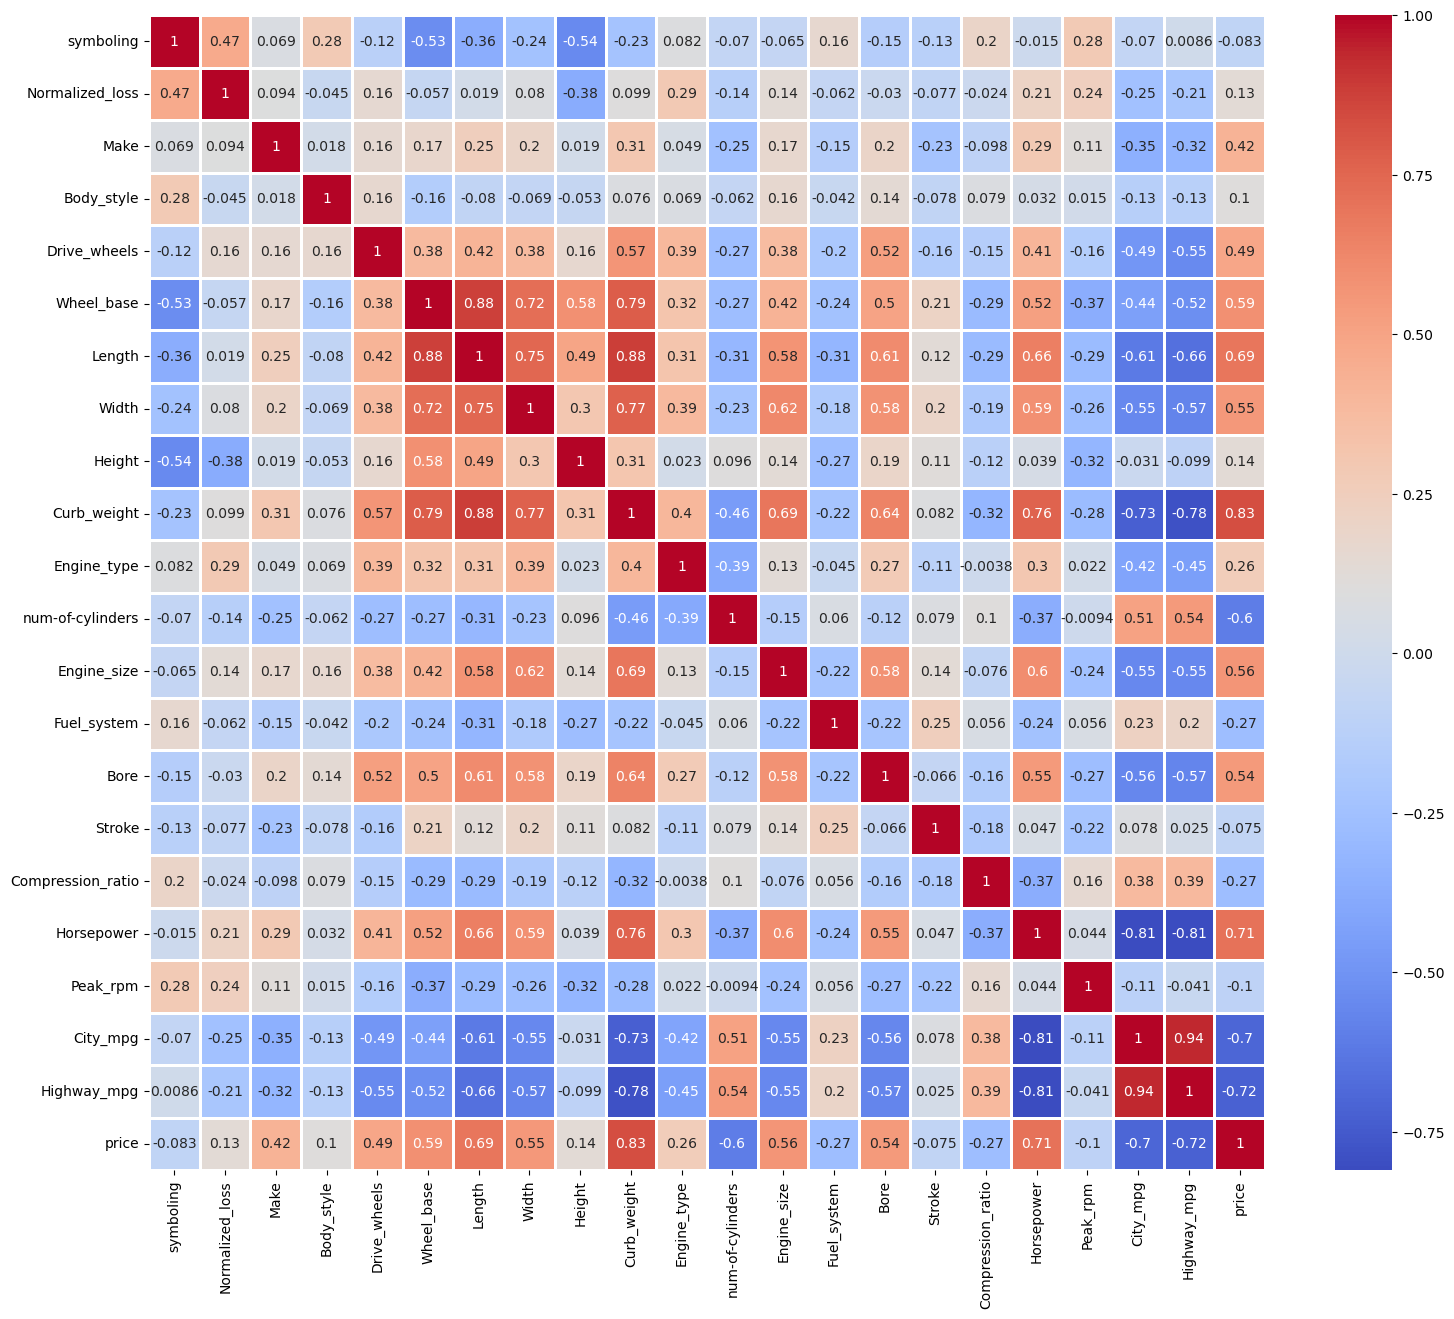

In [576]:
plt.figure(figsize=(18,15))
sns.heatmap(res,annot=True,cmap="coolwarm",linewidths=0.9)
plt.show()

In [577]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [578]:
vif_data = pd.DataFrame(res)
vif_data["feature"] = res.columns
vif_data["VIF"] = [variance_inflation_factor(res.values, i) for i in range(len(res.columns))]

In [579]:
(vif_data["VIF"])

symboling              34.529205
Normalized_loss        14.892683
Make                    5.307865
Body_style              6.265022
Drive_wheels           37.460750
Wheel_base            620.596650
Length               1105.935674
Width                 102.397652
Height                 31.627876
Curb_weight          3049.055898
Engine_type            24.343580
num-of-cylinders       45.188811
Engine_size           114.447155
Fuel_system            10.724832
Bore                   61.813869
Stroke                  6.738105
Compression_ratio      14.252634
Horsepower            184.618238
Peak_rpm               18.186984
City_mpg             1353.805458
Highway_mpg          1489.073529
price                 395.559155
Name: VIF, dtype: float64

In [580]:
columns_to_drop = ['Curb_weight', 'Highway_mpg', 'Horsepower', 'Length', 'Width']

In [581]:
data=data.drop(['Curb_weight', 'Highway_mpg', 'Horsepower', 'Length', 'Width'],axis=1)

In [582]:
data

symboling  Normalized_loss  Make  Body_style  Drive_wheels  Wheel_base  \
0            3            122.0    18           4             1        88.6   
1            1            122.0    18           1             1        94.5   
2            2            164.0    13           0             0        99.8   
3            2            164.0    13           0             2        99.4   
4            2            122.0    13           0             0        99.8   
..         ...              ...   ...         ...           ...         ...   
195         -1             95.0     8           0             1       109.1   
196         -1             95.0     8           0             1       109.1   
197         -1             95.0     8           0             1       109.1   
198         -1             95.0     8           0             1       109.1   
199         -1             95.0     8           0             1       109.1   

     Height  Engine_type  num-of-cylinders  Engine_size  Fuel_system  Bore  \
0      48.8            3                 6        130.0            0  3.47   
1      52.4            2                 5        152.0            0  2.68   
2      54.3            0                 6        109.0            0  3.19   
3      54.3            0                 4        136.0            0  3.19   
4      53.1            0                 4        136.0            0  3.19   
..      ...          ...               ...          ...          ...   ...   
195    55.5            0                 6        141.0            0  3.78   
196    55.5            0                 6        141.0            0  3.78   
197    55.5            2                 5        173.0            0  3.58   
198    55.5            0                 5        145.0            2  3.01   
199    55.5            0                 6        141.0            0  3.78   

     Stroke  Compression_ratio  Peak_rpm  City_mpg  price  Fuel_gas  \
0      2.68                9.0    5000.0      21.0  16500      True   
1      3.47                9.0    5000.0      19.0  16500      True   
2      3.40               10.0    5500.0      24.0  13950      True   
3      3.40                8.0    5500.0      18.0  17450      True   
4      3.40                8.5    5500.0      19.0  15250      True   
..      ...                ...       ...       ...    ...       ...   
195    3.15                9.5    5400.0      23.0  16845      True   
196    3.15                8.7    5300.0      19.0  19045      True   
197    2.87                8.8    5500.0      18.0  21485      True   
198    3.40                9.0    4800.0      26.0  22470     False   
199    3.15                9.5    5400.0      19.0  22625      True   

     aspiration_turbo  Doors_two  Engine_location_rear  
0               False       True                 False  
1               False       True                 False  
2               False      False                 False  
3               False      False                 False  
4               False       True                 False  
..                ...        ...                   ...  
195             False      False                 False  
196              True      False                 False  
197             False      False                 False  
198              True      False                 False  
199              True      False                 False  

[200 rows x 21 columns]

In [583]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('price')

In [584]:
scaler=StandardScaler()
data[num_cols]=scaler.fit_transform(data[num_cols])

In [585]:
data

symboling  Normalized_loss      Make  Body_style  Drive_wheels  \
0     1.742368         0.000000  2.225571    3.283429      0.961074   
1     0.136499         0.000000  2.225571    0.195565      0.961074   
2     0.939433         1.312654  1.286908   -0.833723     -0.786334   
3     0.939433         1.312654  1.286908   -0.833723      2.708483   
4     0.939433         0.000000  1.286908   -0.833723     -0.786334   
..         ...              ...       ...         ...           ...   
195  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
196  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
197  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
198  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
199  -1.469370        -0.843849  0.348244   -0.833723      0.961074   

     Wheel_base    Height  Engine_type  num-of-cylinders  Engine_size  \
0     -1.701436 -2.060585     1.713590          0.425161     0.355803   
1     -0.721882 -0.574437     0.965297         -0.599323     1.145680   
2      0.158057  0.209918    -0.531288          0.425161    -0.398170   
3      0.091646  0.209918    -0.531288         -1.623806     0.571224   
4      0.158057 -0.285464    -0.531288         -1.623806     0.571224   
..          ...       ...          ...               ...          ...   
195    1.702100  0.705301    -0.531288          0.425161     0.750742   
196    1.702100  0.705301    -0.531288          0.425161     0.750742   
197    1.702100  0.705301     0.965297         -0.599323     1.899653   
198    1.702100  0.705301    -0.531288         -0.599323     0.894356   
199    1.702100  0.705301    -0.531288          0.425161     0.750742   

     Fuel_system      Bore    Stroke  Compression_ratio  Peak_rpm  City_mpg  \
0      -0.765199  0.522603 -3.388699           0.159630 -0.248897 -0.660749   
1      -0.765199 -2.426370  1.014402           0.159630 -0.248897 -0.994461   
2      -0.765199 -0.522603  0.624254           2.085206  0.796888 -0.160182   
3      -0.765199 -0.522603  0.624254          -1.765946  0.796888 -1.161317   
4      -0.765199 -0.522603  0.624254          -0.803158  0.796888 -0.994461   
..           ...       ...       ...                ...       ...       ...   
195    -0.765199  1.679795 -0.769132           1.122418  0.587731 -0.327038   
196    -0.765199  1.679795 -0.769132          -0.418043  0.378574 -0.994461   
197    -0.765199  0.933219 -2.329725          -0.225485  0.796888 -1.161317   
198     0.757586 -1.194521  0.624254           0.159630 -0.667211  0.173530   
199    -0.765199  1.679795 -0.769132           1.122418  0.587731 -0.994461   

     price  Fuel_gas  aspiration_turbo  Doors_two  Engine_location_rear  
0    16500      True             False       True                 False  
1    16500      True             False       True                 False  
2    13950      True             False      False                 False  
3    17450      True             False      False                 False  
4    15250      True             False       True                 False  
..     ...       ...               ...        ...                   ...  
195  16845      True             False      False                 False  
196  19045      True              True      False                 False  
197  21485      True             False      False                 False  
198  22470     False              True      False                 False  
199  22625      True              True      False                 False  

[200 rows x 21 columns]

In [586]:
print(data[num_cols].mean())

symboling            1.776357e-17
Normalized_loss     -8.881784e-18
Make                 5.329071e-17
Body_style          -5.329071e-17
Drive_wheels         5.329071e-17
Wheel_base           2.664535e-16
Height              -2.486900e-15
Engine_type          0.000000e+00
num-of-cylinders     1.065814e-16
Engine_size         -1.065814e-16
Fuel_system          3.552714e-17
Bore                -1.953993e-16
Stroke              -8.526513e-16
Compression_ratio    8.348877e-16
Peak_rpm            -3.552714e-17
City_mpg            -1.554312e-16
dtype: float64


# 1. Categorical Feature Encoding:

Challenge: The dataset contained multiple categorical features with varying levels of cardinality, making it challenging to decide on an appropriate encoding strategy.

Solution: For high cardinality features like "Make" and "Fuel System," manual encoding was performed by mapping categories to numerical values based on domain knowledge. One-hot encoding was chosen for features with fewer categories, such as "Fuel Type" and "Aspiration."



# 2.Correlated Features

Challenge: The dataset contained features that were highly correlated, leading to potential multicollinearity issues.

Solution: Correlation analysis was conducted to identify highly correlated features. To mitigate multicollinearity, feature selection techniques like excluding one of the correlated features or using dimensionality reduction methods could be considered.

***Conclusion:** The feature engineering and data preprocessing process successfully transformed the raw automobile dataset into a suitable format for machine learning. Categorical features were encoded using appropriate techniques, the data was split into training and testing sets, and initial feature selection was performed based on feature correlations. The preprocessed data is now ready for further analysis using machine learning algorithms to build predictive models for automobile prices.

# Split Data

In [594]:
x=data.drop('price',axis=1)
y=data['price']

In [595]:
x

symboling  Normalized_loss      Make  Body_style  Drive_wheels  \
0     1.742368         0.000000  2.225571    3.283429      0.961074   
1     0.136499         0.000000  2.225571    0.195565      0.961074   
2     0.939433         1.312654  1.286908   -0.833723     -0.786334   
3     0.939433         1.312654  1.286908   -0.833723      2.708483   
4     0.939433         0.000000  1.286908   -0.833723     -0.786334   
..         ...              ...       ...         ...           ...   
195  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
196  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
197  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
198  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
199  -1.469370        -0.843849  0.348244   -0.833723      0.961074   

     Wheel_base    Height  Engine_type  num-of-cylinders  Engine_size  \
0     -1.701436 -2.060585     1.713590          0.425161     0.355803   
1     -0.721882 -0.574437     0.965297         -0.599323     1.145680   
2      0.158057  0.209918    -0.531288          0.425161    -0.398170   
3      0.091646  0.209918    -0.531288         -1.623806     0.571224   
4      0.158057 -0.285464    -0.531288         -1.623806     0.571224   
..          ...       ...          ...               ...          ...   
195    1.702100  0.705301    -0.531288          0.425161     0.750742   
196    1.702100  0.705301    -0.531288          0.425161     0.750742   
197    1.702100  0.705301     0.965297         -0.599323     1.899653   
198    1.702100  0.705301    -0.531288         -0.599323     0.894356   
199    1.702100  0.705301    -0.531288          0.425161     0.750742   

     Fuel_system      Bore    Stroke  Compression_ratio  Peak_rpm  City_mpg  \
0      -0.765199  0.522603 -3.388699           0.159630 -0.248897 -0.660749   
1      -0.765199 -2.426370  1.014402           0.159630 -0.248897 -0.994461   
2      -0.765199 -0.522603  0.624254           2.085206  0.796888 -0.160182   
3      -0.765199 -0.522603  0.624254          -1.765946  0.796888 -1.161317   
4      -0.765199 -0.522603  0.624254          -0.803158  0.796888 -0.994461   
..           ...       ...       ...                ...       ...       ...   
195    -0.765199  1.679795 -0.769132           1.122418  0.587731 -0.327038   
196    -0.765199  1.679795 -0.769132          -0.418043  0.378574 -0.994461   
197    -0.765199  0.933219 -2.329725          -0.225485  0.796888 -1.161317   
198     0.757586 -1.194521  0.624254           0.159630 -0.667211  0.173530   
199    -0.765199  1.679795 -0.769132           1.122418  0.587731 -0.994461   

     Fuel_gas  aspiration_turbo  Doors_two  Engine_location_rear  
0        True             False       True                 False  
1        True             False       True                 False  
2        True             False      False                 False  
3        True             False      False                 False  
4        True             False       True                 False  
..        ...               ...        ...                   ...  
195      True             False      False                 False  
196      True              True      False                 False  
197      True             False      False                 False  
198     False              True      False                 False  
199      True              True      False                 False  

[200 rows x 20 columns]

In [596]:
y

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: price, Length: 200, dtype: int64

In [597]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=22)


In [598]:
x_train

symboling  Normalized_loss      Make  Body_style  Drive_wheels  \
82    0.136499         0.093761 -0.590419   -0.833723     -0.786334   
179   0.939433        -0.875103 -0.214954   -0.833723     -0.786334   
72    0.939433         1.218893 -0.590419    0.195565     -0.786334   
94    0.939433         1.437668 -0.965885    2.254141     -0.786334   
173   1.742368         2.344025 -1.153617    0.195565      0.961074   
..         ...              ...       ...         ...           ...   
100   1.742368         2.250264 -0.965885    0.195565      0.961074   
192  -1.469370        -1.500176  0.348244    1.224853      0.961074   
44   -0.666436         0.000000  1.850106   -0.833723      0.961074   
132   0.939433        -0.562566  1.474640   -0.833723     -0.786334   
117   0.136499         1.000117  1.099175   -0.833723     -0.786334   

     Wheel_base    Height  Engine_type  num-of-cylinders  Engine_size  \
82    -0.423035 -0.904692    -0.531288          0.425161     0.068576   
179   -0.257009  0.787865    -0.531288          0.425161    -0.829011   
72    -0.854703 -1.234947    -0.531288          0.425161    -1.008529   
94    -0.622266 -0.202900    -0.531288          0.425161    -0.829011   
173    0.672738 -0.739565     1.713590         -0.599323     1.827846   
..          ...       ...          ...               ...          ...   
100   -1.253166 -1.689048     0.965297         -0.599323     2.186881   
192    0.905175  1.530939    -0.531288          0.425161     0.750742   
44     2.349602 -0.409310     1.713590         -0.599323    -0.021183   
132    0.041839  0.952992     1.713590          0.425161     0.032672   
117   -0.854703 -1.234947    -0.531288          0.425161    -1.080336   

     Fuel_system      Bore    Stroke  Compression_ratio  Peak_rpm  City_mpg  \
82     -0.003807  0.074658  0.958667          -0.803158 -0.248897  0.006674   
179     0.757586 -1.194521  0.624254           0.159630 -0.667211  2.008945   
72     -0.003807 -1.343836 -0.323249           0.929861  0.796888  2.008945   
94     -0.003807 -0.671918  0.011164           0.929861  0.169417  1.007809   
173    -0.765199 -0.223973  0.345577           0.737303  0.169417 -0.827605   
..           ...       ...       ...                ...       ...       ...   
100    -0.765199  0.373288 -0.100307           0.159630  0.169417 -0.994461   
192    -0.765199  1.679795 -0.769132           1.122418  0.587731 -0.160182   
44     -0.765199  1.119863  0.011164          -1.573388 -0.771789 -1.661885   
132    -0.765199  0.783904 -1.215016           0.159630  0.796888 -0.994461   
117    -0.003807 -1.343836 -0.323249           0.929861  0.796888  1.007809   

     Fuel_gas  aspiration_turbo  Doors_two  Engine_location_rear  
82       True             False      False                 False  
179     False             False      False                 False  
72       True             False       True                 False  
94       True             False       True                 False  
173      True             False       True                 False  
..        ...               ...        ...                   ...  
100      True             False       True                 False  
192      True             False      False                 False  
44       True             False      False                 False  
132      True              True      False                 False  
117      True             False      False                 False  

[150 rows x 20 columns]

In [599]:
y_train

82      8189
179     7995
72      5389
94      8249
173    16558
       ...  
100    17199
192    16515
44     35550
132    18620
117     6692
Name: price, Length: 150, dtype: int64

In [600]:
x_test

symboling  Normalized_loss      Make  Body_style  Drive_wheels  \
144  -0.666436        -1.156386 -0.027221    1.224853      2.708483   
157  -0.666436        -0.968864 -1.153617   -0.833723     -0.786334   
32    0.136499        -0.656327 -0.402687    0.195565     -0.786334   
98   -0.666436        -0.437551 -0.965885    1.224853     -0.786334   
163   0.939433         0.375044 -1.153617    2.254141      0.961074   
78    1.742368         0.000000 -0.590419    0.195565     -0.786334   
91    0.136499         0.187522 -0.965885    0.195565     -0.786334   
170  -1.469370        -1.781459 -1.153617    0.195565     -0.786334   
124   1.742368         0.000000  1.662373    3.283429      0.961074   
75    0.136499         1.218893 -0.590419    0.195565     -0.786334   
189  -2.272305        -0.593820  0.348244   -0.833723      0.961074   
176  -1.469370         0.000000 -1.153617    1.224853      0.961074   
104  -0.666436         1.218893  0.160511   -0.833723      0.961074   
20    0.136499        -0.125015  0.535977    0.195565     -0.786334   
87    0.136499         0.187522 -0.965885   -0.833723     -0.786334   
46    0.136499        -0.562566 -0.778152    0.195565     -0.786334   
128   0.939433        -0.562566  1.474640   -0.833723     -0.786334   
36   -0.666436        -0.500059 -0.402687    0.195565     -0.786334   
135   0.939433        -1.218893 -0.027221    0.195565      2.708483   
12    0.136499         0.000000  0.911442   -0.833723      0.961074   
194  -1.469370        -1.500176  0.348244    1.224853      0.961074   
92    0.136499         0.000000 -0.965885   -0.833723     -0.786334   
142  -0.666436        -1.031371 -0.027221    1.224853     -0.786334   
160   0.136499         1.437668 -1.153617   -0.833723      0.961074   
50    0.136499        -0.281283 -0.778152   -0.833723     -0.786334   
199  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
73    0.939433         1.218893 -0.590419    0.195565     -0.786334   
166   0.939433         0.375044 -1.153617    0.195565      0.961074   
41   -0.666436         0.000000  2.413304   -0.833723      0.961074   
30    0.136499        -0.656327 -0.402687    0.195565     -0.786334   
161   0.136499         1.437668 -1.153617    0.195565      0.961074   
3     0.939433         1.312654  1.286908   -0.833723      2.708483   
66   -1.469370        -0.906356  0.723710   -0.833723      0.961074   
180   0.939433        -0.875103 -0.214954   -0.833723     -0.786334   
191  -2.272305        -0.593820  0.348244   -0.833723      0.961074   
13   -0.666436         0.000000  0.911442   -0.833723      0.961074   
99   -0.666436        -0.437551 -0.965885   -0.833723     -0.786334   
153  -0.666436        -0.968864 -1.153617   -0.833723     -0.786334   
6     0.136499         0.000000  1.286908    1.224853     -0.786334   
158   0.136499         1.437668 -1.153617   -0.833723      0.961074   
61   -0.666436        -0.125015 -0.778152   -0.833723      0.961074   
151  -0.666436        -0.968864 -1.153617   -0.833723     -0.786334   
31    0.136499        -0.656327 -0.402687    0.195565     -0.786334   
150  -0.666436        -0.968864 -1.153617    1.224853      2.708483   
148  -0.666436        -1.406415 -1.153617    1.224853     -0.786334   
154  -0.666436        -0.968864 -1.153617    0.195565     -0.786334   
77    1.742368         0.968864 -0.590419    0.195565     -0.786334   
119  -1.469370        -1.500176  1.099175    1.224853     -0.786334   
25    0.136499         0.812595  0.535977   -0.833723     -0.786334   
43   -0.666436         0.718834  1.850106   -0.833723      0.961074   

     Wheel_base    Height  Engine_type  num-of-cylinders  Engine_size  \
144   -0.323419  0.457610     0.217005          0.425161    -0.434073   
157   -0.522650 -0.409310    -0.531288          0.425161    -0.793108   
32    -0.854703 -0.491874    -0.531288          0.425161    -1.008529   
98     0.257673  0.952992     0.965297         -0.599323     2.186881   
163   -0.074380 -0

In [601]:
y_test

144    11694
157     9258
32      7129
98     14399
163     9639
78     12629
91      7799
170     9988
124    37028
75      7689
189    12940
176    15750
104    13200
20      6377
87      6649
46      5195
128    12170
36      9095
135     7603
12     24565
194    18950
92      7499
142    10198
160     9298
50      7395
199    22625
73      6189
166    11549
41      6785
30      5399
161     9538
3      17450
66     31600
180     8195
191    15985
13     30760
99     13499
153     7898
6      18920
158     8058
61     18280
151     6938
31      6529
150     8778
148     6918
154     7788
77      8499
119     8921
25      8558
43     32250
Name: price, dtype: int64

In [602]:
print(x.shape)
print(y.shape)

(200, 20)
(200,)


# LinearRegression:

In [604]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [605]:
y_pred=lr.predict(x_test)
y_pred

array([13919.22805487,  8025.34908134,  4941.32484051, 14549.4841887 ,
       14736.48336372, 12685.9203563 ,  5816.1747571 , 11487.01558101,
       33429.10847979,  8495.81576599, 16149.07317897, 15722.39183991,
       14175.18002975,  7404.05334422,  5090.15490677,  5670.24963662,
       15013.56738614,  7338.71396117,  9910.58109314, 20487.72283661,
       20144.52487963,  4776.2883173 , 10625.59039519,  6967.91267449,
        4907.61048879, 20551.02584827,  7156.37066453, 14434.26640413,
       12636.19798221,  1033.49652481,  7119.02115429, 25112.41545459,
       31294.99493797,  9503.78595044, 15742.72326048, 23615.28141573,
       13913.66020092, 10113.87537156, 24300.25697905,  9159.34548878,
       21049.04372138,  7116.83068261,  4941.32484051,  8132.81222816,
        3797.26990138,  8735.40273917, 13566.60846385, 12254.95535205,
       11916.37708331, 27371.49664007])

In [606]:
from sklearn.metrics import *

In [607]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)*100
print('MAE:',mae)
print('MAE:',mse)
print('MAE:',rmse)
print('MAE:',r2)

MAE: 2329.659217147025
MAE: 8769794.26821673
MAE: 2961.383843444941
MAE: 84.36148245508886


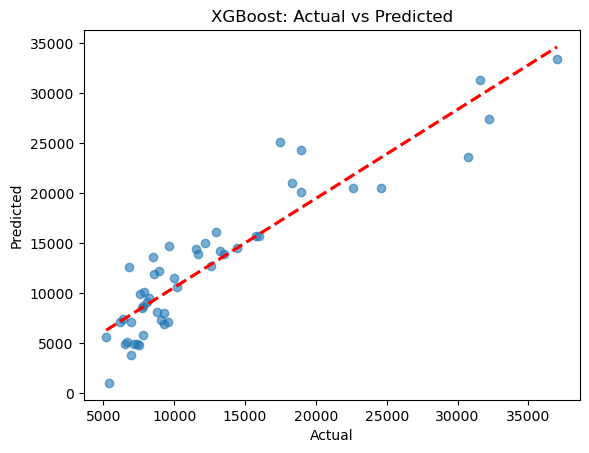

In [608]:
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'alpha':0.6}, line_kws={"color":"red","ls":"--"})
plt.xlabel('Actual Price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

# Random_forest_alogrithm

In [610]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(x_train,y_train)

RandomForestRegressor()

In [611]:
Y_pred=rr.predict(x_test)
Y_pred

array([10246.29      ,  7991.06      ,  6713.65      , 15990.47      ,
       10559.65      , 14357.66666667,  6913.35619048, 11245.06      ,
       31626.        ,  7954.18      , 15831.67333333, 16086.91583333,
       17147.64166667,  6248.53      ,  6403.12285714,  6474.52      ,
       14963.55333333,  8470.16333333,  7696.6       , 18275.02416667,
       18086.75      ,  6799.74714286,  9508.2       ,  8861.48666667,
        6715.245     , 17298.48333333,  6479.88666667, 10435.08333333,
        9074.56      ,  6004.26      ,  8841.545     , 18575.77      ,
       26123.02      ,  8836.46      , 16369.69      , 37051.91      ,
       16042.5425    ,  8468.96833333, 16277.88      ,  8103.93      ,
       16615.09333333,  7462.25      ,  6713.65      ,  7736.35      ,
        7142.44      ,  8425.58166667,  9052.345     , 11012.43      ,
        8547.57      , 35653.83      ])

In [612]:
mae=mean_absolute_error(y_test,Y_pred)
mse=mean_squared_error(y_test,Y_pred)
rmse=root_mean_squared_error(y_test,rr_pred)
r2=r2_score(y_test,Y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('r2score:',r2)

MAE: 1551.2756928571428
MSE: 5192642.598063486
RMSE: 2994.529701614267
r2score: 0.9074034921565142


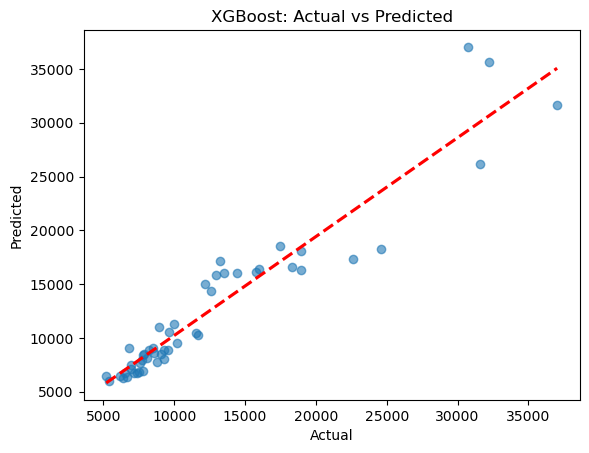

In [613]:
sns.regplot(x=y_test, y=Y_pred, ci=None, scatter_kws={'alpha':0.6}, line_kws={"color":"red","ls":"--"})
plt.xlabel('Actual Price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

# Ridge Regression

In [615]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.1)
rr.fit(x_train,y_train)

Ridge(alpha=0.1)

In [616]:
rr_pred=rr.predict(x_test)
rr_pred

array([13980.57984049,  7976.96066488,  4955.62796202, 14761.92406581,
       14770.66362475, 12742.30333915,  5777.88598603, 11382.57501923,
       32716.54296722,  8414.72897995, 16218.52958195, 15799.23223266,
       14145.49865958,  7367.78316712,  5053.38667058,  5642.76303798,
       15094.17873604,  7336.12349094,  9993.75400448, 20555.98310506,
       20194.95566489,  4778.08228821, 10665.82884201,  7033.18705262,
        4910.08706575, 20528.38574211,  7097.86106454, 14442.85426009,
       12668.48506118,  1048.81335398,  7197.09173495, 25233.33939021,
       31265.03213424,  9543.86356265, 15822.18225587, 23610.07254683,
       14108.58224327, 10061.27101707, 24378.43870857,  9077.22711889,
       21062.38445865,  7090.83357388,  4955.62796202,  8174.78895399,
        3857.58342893,  8733.21883395, 13520.41463555, 12316.09611711,
       11853.76755245, 27226.64189756])

In [617]:
mae=mean_absolute_error(y_test,rr_pred)
mse=mean_squared_error(y_test,rr_pred)
rmse=root_mean_squared_error(y_test,rr_pred)
r2_sc=r2_score(y_test,rr_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('r2score:',r2_sc)

MAE: 2354.6569826068544
MSE: 8967208.133850032
RMSE: 2994.529701614267
r2score: 0.840094490884107


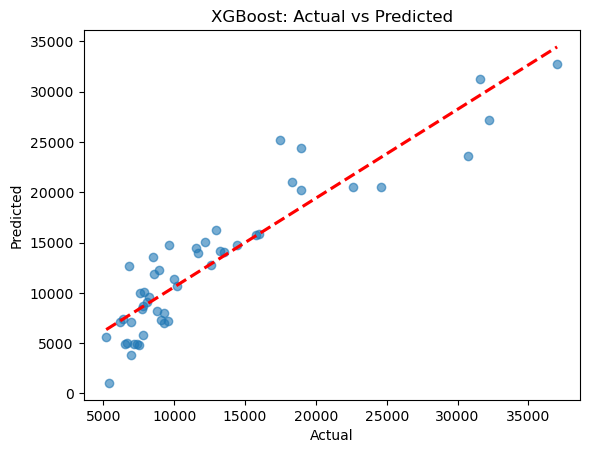

In [618]:
sns.regplot(x=y_test, y=rr_pred, ci=None, scatter_kws={'alpha':0.6}, line_kws={"color":"red","ls":"--"})
plt.xlabel('Actual Price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

# XGBOOST

In [620]:
from xgboost import XGBRegressor

In [621]:
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,random_state=42)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [622]:
xgb_pred=xgb.predict(x_test)
xgb_pred

array([ 9812.563 ,  7686.351 ,  6546.8013, 14384.156 ,  9932.467 ,
       14446.522 ,  6748.515 , 11186.195 , 33226.945 ,  8054.8657,
       15785.58  , 15793.465 , 17391.613 ,  6122.304 ,  6486.3853,
        6403.3076, 15276.047 ,  8341.317 ,  8248.313 , 18351.81  ,
       17105.727 ,  6928.722 ,  9734.317 ,  9688.54  ,  6768.0938,
       18365.607 ,  6340.7163, 10048.23  , 12116.769 ,  5866.2334,
        9431.166 , 24592.217 , 25998.535 ,  8797.634 , 16870.453 ,
       38476.426 , 15393.918 ,  9070.505 , 16672.584 ,  8328.132 ,
       16444.248 ,  7508.4893,  6546.8013,  8006.324 ,  6846.5854,
        9104.213 ,  8578.133 , 11127.03  ,  8863.6   , 25959.951 ],
      dtype=float32)

In [623]:
mae=mean_absolute_error(y_test,xgb_pred)
mse=mean_squared_error(y_test,xgb_pred)
rmse=root_mean_squared_error(y_test,xgb_pred)
r2_sc=r2_score(y_test,xgb_pred)*100
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('r2score:',r2_sc)

MAE: 1774.2388671875
MSE: 7212099.083842898
RMSE: 2685.5351578117347
r2score: 87.13920712471008


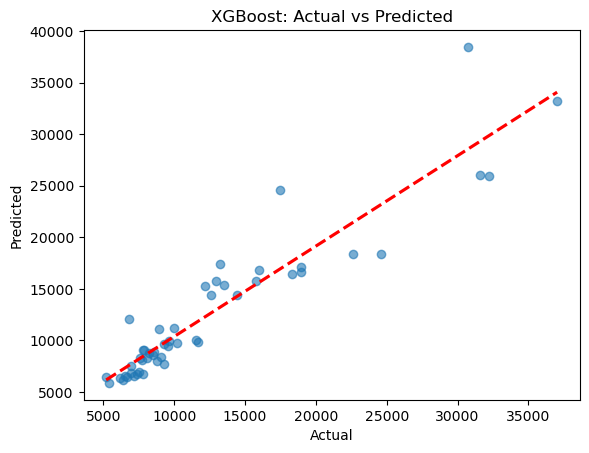

In [624]:
sns.regplot(x=y_test, y=xgb_pred, ci=None, scatter_kws={'alpha':0.6}, line_kws={"color":"red","ls":"--"})
plt.xlabel('Actual Price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost: Actual vs Predicted')
plt.show()

# Deployment

In [626]:
import pickle

In [791]:
x

symboling  Normalized_loss      Make  Body_style  Drive_wheels  \
0     1.742368         0.000000  2.225571    3.283429      0.961074   
1     0.136499         0.000000  2.225571    0.195565      0.961074   
2     0.939433         1.312654  1.286908   -0.833723     -0.786334   
3     0.939433         1.312654  1.286908   -0.833723      2.708483   
4     0.939433         0.000000  1.286908   -0.833723     -0.786334   
..         ...              ...       ...         ...           ...   
195  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
196  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
197  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
198  -1.469370        -0.843849  0.348244   -0.833723      0.961074   
199  -1.469370        -0.843849  0.348244   -0.833723      0.961074   

     Wheel_base    Height  Engine_type  num-of-cylinders  Engine_size  \
0     -1.701436 -2.060585     1.713590          0.425161     0.355803   
1     -0.721882 -0.574437     0.965297         -0.599323     1.145680   
2      0.158057  0.209918    -0.531288          0.425161    -0.398170   
3      0.091646  0.209918    -0.531288         -1.623806     0.571224   
4      0.158057 -0.285464    -0.531288         -1.623806     0.571224   
..          ...       ...          ...               ...          ...   
195    1.702100  0.705301    -0.531288          0.425161     0.750742   
196    1.702100  0.705301    -0.531288          0.425161     0.750742   
197    1.702100  0.705301     0.965297         -0.599323     1.899653   
198    1.702100  0.705301    -0.531288         -0.599323     0.894356   
199    1.702100  0.705301    -0.531288          0.425161     0.750742   

     Fuel_system      Bore    Stroke  Compression_ratio  Peak_rpm  City_mpg  \
0      -0.765199  0.522603 -3.388699           0.159630 -0.248897 -0.660749   
1      -0.765199 -2.426370  1.014402           0.159630 -0.248897 -0.994461   
2      -0.765199 -0.522603  0.624254           2.085206  0.796888 -0.160182   
3      -0.765199 -0.522603  0.624254          -1.765946  0.796888 -1.161317   
4      -0.765199 -0.522603  0.624254          -0.803158  0.796888 -0.994461   
..           ...       ...       ...                ...       ...       ...   
195    -0.765199  1.679795 -0.769132           1.122418  0.587731 -0.327038   
196    -0.765199  1.679795 -0.769132          -0.418043  0.378574 -0.994461   
197    -0.765199  0.933219 -2.329725          -0.225485  0.796888 -1.161317   
198     0.757586 -1.194521  0.624254           0.159630 -0.667211  0.173530   
199    -0.765199  1.679795 -0.769132           1.122418  0.587731 -0.994461   

     Fuel_gas  aspiration_turbo  Doors_two  Engine_location_rear  
0        True             False       True                 False  
1        True             False       True                 False  
2        True             False      False                 False  
3        True             False      False                 False  
4        True             False       True                 False  
..        ...               ...        ...                   ...  
195      True             False      False                 False  
196      True              True      False                 False  
197      True             False      False                 False  
198     False              True      False                 False  
199      True              True      False                 False  

[200 rows x 20 columns]

In [806]:
#X_input = np.array([[3,	122.0	,18,	4,	1,	88.6,	168.8	,64.1,	48.8,	2548	
                     ,3	,6	,130.0,	0,	3.47,	2.68,	9.0,	111.0,	5000.0,	21.0,	27.0,
                     16500,	True,	False,	True,	False]])


IndentationError: unexpected indent (2723138592.py, line 2)

In [815]:
d=([[1.742368, 0.000000, 2.225571, 3.283429, 0.961074, -1.701436,
                     -2.060585, 1.713590, 0.425161, 0.355803, -0.765199, 0.522603,
                     -3.388699, 0.159630, -0.248897, -0.660749,
                     True, False, True, False]])

In [817]:
le

1

In [827]:
X_input=([[3,122.0	,18	,4	,1	,88.6	,48.8,	3	,6,	130.0	,0	,3.47	,2.68	,9.0	,5000.0	,21.0,True	,False,	True,False]])

In [829]:
y_prediction = xgb.predict(X_input)

In [831]:
y_prediction

array([21690.162], dtype=float32)

In [833]:
xgb.intercept_

array([13460.62], dtype=float32)

In [837]:
xgb.coef_

AttributeError: Coefficients are not defined for Booster type None